# **Australia Rain Prediction**
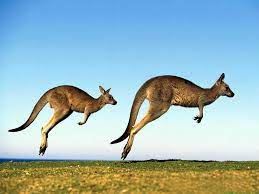

In this project we attempt to predict whether tomorrow it will rain in different areas of Australia based on ["Rain in Australia" dataset](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package).




*   Ido Levkovitch - 205619919
*   Hadas Sela - 316312842
*   Ofir Itzhak - 205796238


>[Australia Rain Prediction](#scrollTo=dRxCLrd1b8Jz)

>>[Exploratory Data Analysis](#scrollTo=Ksm8mXlwn7Is)

>>>[Categorical Varaibles Analysis](#scrollTo=dVB04Lsr4Kdc)

>>>>[Location](#scrollTo=vsLn9UW1oPyG)

>>>>[WindGustDir     Analysis](#scrollTo=dT4Nr1jsuU16)

>>>>[WindDir9am](#scrollTo=OlOK1GPiwUFQ)

>>>>[WindDir3pm](#scrollTo=3-9QPQwtxZfS)

>>>>[RainToday](#scrollTo=NoI4kUh7yZmx)

>>>>[RainTomorrow Analysis](#scrollTo=nbrEzOa80xv_)

>>>[Numerical Variables Analysis](#scrollTo=V6pl0DMT5C4d)

>>>>[Date](#scrollTo=EHxQq0tTPA-R)

>>>>[Numerical Variables Overview](#scrollTo=e2E0aXkaYmPM)

>>>>[MinTemp](#scrollTo=M-4msxII8gQp)

>>>>[MaxTemp](#scrollTo=Dtxnr7Zy9wnf)

>>>>[Rainfall](#scrollTo=UigDRn-z-Iqt)

>>>>[Evaporation](#scrollTo=Jn9NBsfr-tKw)

>>>>[Sunshine](#scrollTo=mW32e8xq_Foy)

>>>>[WindGustSpeed](#scrollTo=dc_JQSMW_yel)

>>>>[WindSpeed9am](#scrollTo=swzq1FslBpgj)

>>>>[WindSpeed3pm](#scrollTo=JE-LZGRnCyfW)

>>>>[Humidity9am](#scrollTo=FE7-JrUiC-9n)

>>>>[Pressure9am](#scrollTo=L1m4UR4QDCQS)

>>>>[Pressure3pm](#scrollTo=s7H_BLThDGgq)

>>>>[Cloud9am](#scrollTo=9ornHHmZDIs7)

>>>>[Cloud3pm](#scrollTo=hN78DHFcDKxN)

>>>>[Temp9am](#scrollTo=SM6Eww7FAJ6A)

>>>>[Temp3pm](#scrollTo=OwkW8yeEAt8v)

>>>>[Outliers](#scrollTo=7frOh_cKZ62e)

>>>[Multivariate Analysis](#scrollTo=7FnoPi1mCwj5)

>>>>[Rainfall per Location](#scrollTo=UptAQOzD3Ncr)

>>>>[Correlations Analysis](#scrollTo=B82M7HHbDVmj)

>>[Feature Engineering](#scrollTo=2WLwCY_Caola)

>>>[Remove Highly Correlated Attributes](#scrollTo=A0m92MbJrAWv)

>>>[Process the Missing Values](#scrollTo=uwi6l9hbxbRK)

>>>>[Remove Rows without Target Value](#scrollTo=HzzZsRsonpxL)

>>>>[Fill Missing Values with Location Median/Mode](#scrollTo=d9DEYAzlov1d)

>>>>[Fill Missing Numerical Values with Global Median](#scrollTo=PQwJ_PEupnjr)

>>>>[Fill Missing Categorical Values with Global Mode](#scrollTo=sCSFh2EtXtgO)

>>>[Process Outliers](#scrollTo=DGjIi8Kcqzqf)

>>>[Replace Categorical Variables with One Hot Encoding](#scrollTo=598SkanlQoOH)

>>[Dividing to Train, Validation and Test](#scrollTo=aVcBRKiO4JEK)

>>[Models](#scrollTo=BqvmD9mZ8LPq)

>>>[Functions for model training](#scrollTo=P6hO8NLI2Xq4)

>>>>[get_accuracy](#scrollTo=ZLCas4NrkSyZ)

>>>>[train_model_cuda](#scrollTo=d0xSooomkY2D)

>>>>[plot_learning_curve](#scrollTo=qUVWHODqXL3F)

>>>>[evaluate_model](#scrollTo=3UeRcHyRkluO)

>>>>[test_model](#scrollTo=7oOTOn7LkpIa)

>>>>[find_best_params](#scrollTo=4aQMw1V4jI_o)

>>>[Global variables for all runs](#scrollTo=1z6FbSyJSa-g)

>>>[Model 1 - Multi Layer Perceptron (MLP)](#scrollTo=XEdF_L4tWNGC)

>>>>[MLP 2-layers Evaluation](#scrollTo=Amv-LdqkWlo0)

>>>>>[Ready to start evaluation](#scrollTo=3NIbfP5OkxAQ)

>>>>>[Intermediate Analysis](#scrollTo=XoMUX5OslV7n)

>>>>[MLP 3-Layers Evaluation](#scrollTo=m6Q6SCj63COc)

>>>>[MLP 4-Layers](#scrollTo=eQ-YxtP73go5)

>>>>[MLP 3-Layers Leaky RLU](#scrollTo=BOIy4Wjn4edD)

>>>>[Results](#scrollTo=iSotzEAXhVQa)

>>>[Model 2 - RNN](#scrollTo=kr_R1bE8jRcz)

>>>[Model 3 - GRU](#scrollTo=ag7KboYBDQ83)

>>>[Model 4 - LSTM](#scrollTo=NvVs5nBPDYMH)

>>[Model Comparison](#scrollTo=RxjEWQr8JGZv)

>>>[Accuracy](#scrollTo=IRWV9oNCY3W_)

>>>[No rain F1-score](#scrollTo=_q3m5z6mgYCq)

>>>[Raining F1-score](#scrollTo=ZO3dw4Xuhezy)

>>[Conclusions](#scrollTo=TJLilAsCMW-q)

>>>[Comparison to Other Sources](#scrollTo=0BX6rdg2l-AE)

>>>[Possible Improvements](#scrollTo=VOXSDWDXn7w2)

>>[References](#scrollTo=ubZBohDA8vOH)



## **Introduction**

Ausralia is a vast continent that holds different climates.

Our goal is to predict Rainfall based on daily weather meteorology data. 

Hence - we seek to predict will it rain the next day - Yes or No ?
 

In [ ]:
import os
import shutil
import numpy as np
import pandas as pd
import scipy 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
torch.set_default_dtype(torch.float32)

from IPython.display import HTML
pd.options.mode.chained_assignment = None  # default='warn'

import cv2 as cv 
from google.colab.patches import cv2_imshow


In [ ]:
torch.cuda.is_available()

False

In [ ]:
if torch.cuda.is_available():
  print(torch.cuda.get_device_name(0))

In [ ]:


PROJECT_PATH= '/content/drive/MyDrive/Intro_to_Deep_Learning/project'

In [ ]:
# %%timeit -r1 -n1
from google.colab import drive
drive.mount('/content/drive')
file_path = os.path.join(PROJECT_PATH,'data/weatherAUS.csv' )
data=pd.read_csv(file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Dataset**

In [ ]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## **Exploratory Data Analysis**

This dataset contains approcximately 10 years of daily weather observations from various locations across Australia.

RainTomorrow is the target variable to predict. It means -- will it rain the next day, Yes or No?

This column is Yes if the it did rain for that day, 1mm or more.
Otherwise, it is a No.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Our data originally contains 145,460 rows of observational information. Each observation holds 23 columns of Meteorological Weather Data, collected from 49 different locations across the Australian Continent. 
> 
As we can see 16 columns are numercial and 7 columns are categorical.
In addition, we see that there are Nan values in all columns except Date and Location.
>

### Categorical Varaibles Analysis

In [ ]:
# find categorical variables

categorical = [var for var in data.columns if data[var].dtype=='O']
categorical

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [ ]:
# check for missing values in categorical variables 

data[categorical].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

#### Location      
The common name of the location of the weather station.

In [ ]:
len(data['Location'].unique())

49

There are 49 unique location values - These are our 49 different locations across the Australian Continent.

In [ ]:
location_value_counts=data['Location'].value_counts()
location_value_counts

Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown         3009


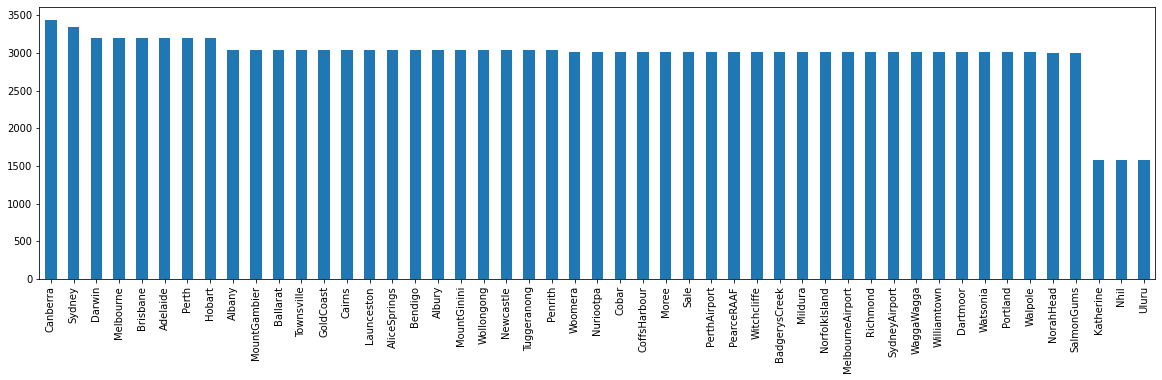

In [ ]:

_=location_value_counts.plot(kind='bar',figsize =(20,5))

We can see that the Location values are distributed more or less uniformly.
Three of the data's locations - Katherine, Nhil and Uluru hold less observations than the others, about a half. Yet this is a small deviation and holds only 3/49 which is ~6% of our data.
As this is a rather small percentage we feel safe to say our data is un-biased in matter of locations.
Recall - this part is truley crucial for our model's success since different location have different likelihood to pure rain due to obvious climate differnce.

For example, if we were to wish forecasting rain in our state of Israel, it is obvious for us as residents that a model for the northern locations will most likley call rain much more than a model for the southern locations, which are much more arid.
If we were to cover the entire country, we would wish to hold an even and un-biased data of both parts.

The same principle is important for our case of Australia.

#### WindGustDir     Analysis
Wind Gusts are a brief increase in the wind speed and usually exceed dominantly above the average wind speed.

This variable holds the direction of the strongest wind gust within the 24 hours of an observation.


In [ ]:
len(data['WindGustDir'].unique())

17

There are 17 unique WindGustDir values

**Wind Directions** represent the direction of which the winds **blows from** and not blows to.
The different possible categorical direction are represented here:

https://www.surfertoday.com/images/stories/compassrose.jpg

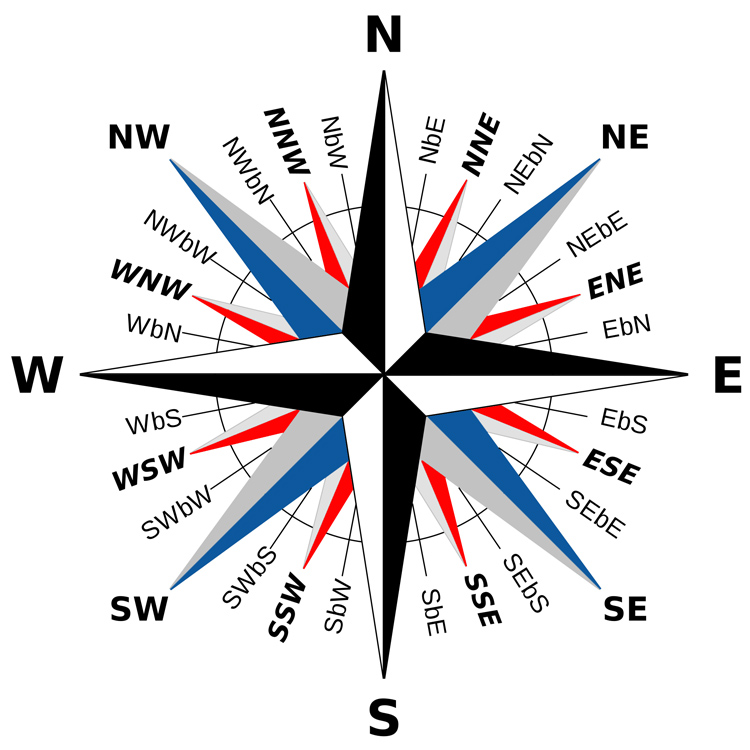

N - Stands for North
S - For south
W - West
E - East

And any combination stands for the combination of them,
For example: SSE - South South East

In [ ]:
WindGustDir_value_counts=data['WindGustDir'].value_counts()
WindGustDir_value_counts

W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64

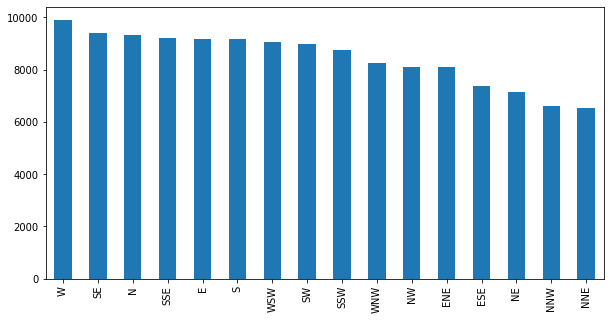

In [ ]:
_=WindGustDir_value_counts.plot(kind='bar',figsize =(10,5))

We can see that the WindGustDir values are distributed more or less uniformly.

If WindGustDir highly correlates with rain, this may help us predict it. All the more so, as it is un-biased.



#### WindDir9am      
Direction of the wind at 9am.
This feaure can be represented same as the previous one.
The only difference is it stands for the wind at 9:00 AM, measured in a specific location.
Note - Wind Speed is different from Wind Gust as it refers to the constant wind speed rather than a brief increase.

In [ ]:
len(data['WindDir9am'].unique())

17

There are 17 unique WindDir9am values

In [ ]:
WindDir9am_value_counts=data['WindDir9am'].value_counts()
WindDir9am_value_counts

N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64

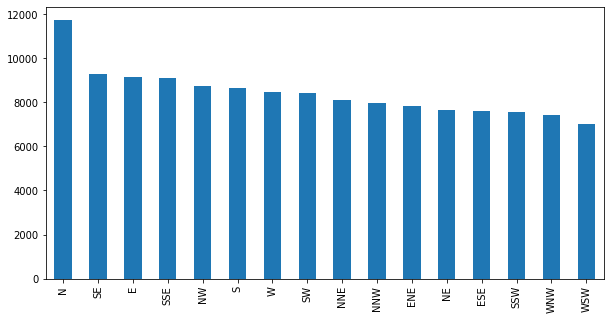

In [ ]:
_=WindDir9am_value_counts.plot(kind='bar',figsize =(10,5))

We can see that the WindDir9am values are distributed more or less uniformly.

If WindDir9am highly correlates with rain, this may help us predict it. All the more so, as it is un-biased.

#### WindDir3pm 
Direction of the wind at 3pm.


In [ ]:
len(data['WindDir3pm'].unique())

17

There are 17 unique WindDir3pm values

In [ ]:
WindDir3pm_value_counts=data['WindDir3pm'].value_counts()
WindDir3pm_value_counts

SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: WindDir3pm, dtype: int64

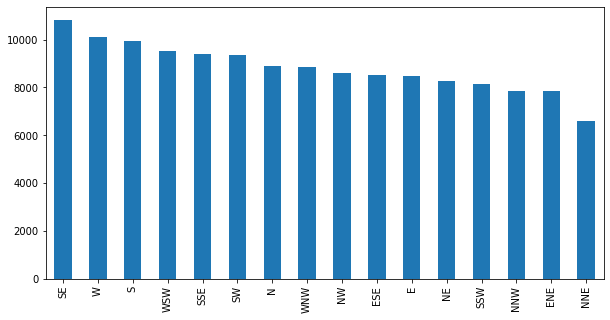

In [ ]:
_=WindDir3pm_value_counts.plot(kind='bar',figsize =(10,5))

We can see that the WindDir3pm values are distributed more or less uniformly.

If WindDir3pm highly correlates with rain, this may help us predict it. All the more so, as it is un-biased.

#### RainToday 
'Yes' if it rained on the day of the measurement

In [ ]:
len(data['RainToday'].unique())

3

There are 3 unique RainToday values

In [ ]:
RainToday_value_counts=data['RainToday'].value_counts()
RainToday_value_counts

No     110319
Yes     31880
Name: RainToday, dtype: int64

We can see 2 values only:

In [ ]:
data['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

The 3rd value is Nan

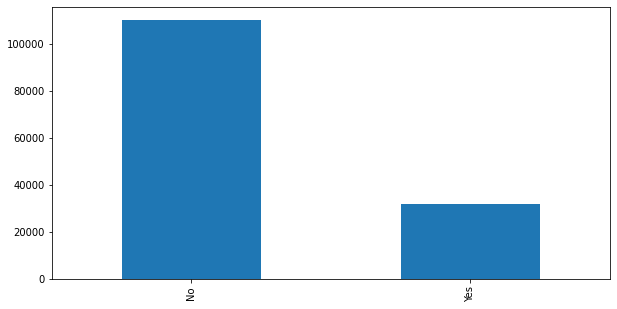

In [ ]:
_=RainToday_value_counts.plot(kind='bar',figsize =(10,5))

In [ ]:
data['RainToday'].isnull().sum()

3261

There are also 3261 Nan values

#### RainTomorrow Analysis
'Yes' if it rains on the next day

In [ ]:
len(data['RainTomorrow'].unique())

3

There are 3 unique RainTomorrow values

In [ ]:
RainTomorrow_value_counts=data['RainTomorrow'].value_counts()
RainTomorrow_value_counts

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [ ]:
data['RainTomorrow'].isnull().sum()

3267

The values ar 'Yes', 'No', and Nan

RainTomorrow is the target variable. **Therefore, we cannot use rows that do not specify this value.**



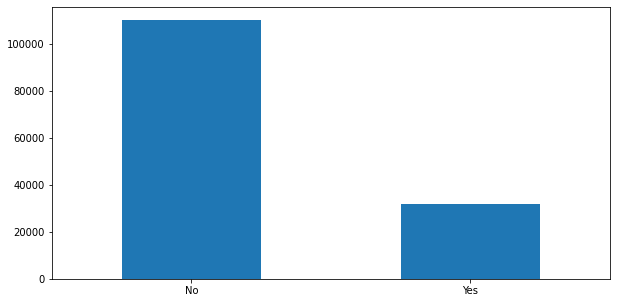

In [ ]:
_=RainTomorrow_value_counts.plot(kind='bar',figsize =(10,5), rot=0)

There are also 3267 Nan values. **There is significant imbalance in target value distribution.**

Hence - our data is biased. We address this bias directly by remembering that we have $\frac{110346}{110316+31877} \approx 0.7758 \approx 78\% $ chance to be correct only by always predicting No (No rain).

This means that our improvment of the model shall be also referenced to that very bias, unlike un-biased data that is usually compared to the classic "coin flip" probability of 50%.
We will look to improve further from 78%.


### Numerical Variables Analysis

#### Date
The date of observation 

We assume that dates are relevant to rainfall predicition at least by some level.

Australia does not overlap with the Equator (which dims seasons), therefore seasons effect should be present within its boundries. 

Seasons, on their turn, will most likley correlate with rainfall, and with months of course. That will, most probably, lead eventually to a correlation between months(dates) and even days, with rain.

Therefore we convert the date strings to numerical values for Year, Month, Day of Month, and Day of Year.

In [ ]:
data['Date']= pd.to_datetime(data['Date'])
data['Year']=data['Date'].dt.year
data['Month']=data['Date'].dt.month
data['DayOfMonth']=data['Date'].dt.day
data['DayOfYear']=data['Date'].dt.dayofyear
data.drop('Date', axis=1, inplace = True) # Do not need it now

In [ ]:
categorical.remove('Date')
categorical

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [ ]:
unique_years=data['Year'].unique()
unique_years.sort()
unique_years

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

We have data for years 2007 - 2017 without gaps

#### Numerical Variables Overview

This includes date-related variables we have just added

In [ ]:
numerical = [var for var in data.columns if data[var].dtype!='O']
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'DayOfMonth',
 'DayOfYear']

In [ ]:
data[numerical].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        143975 non-null  float64
 1   MaxTemp        144199 non-null  float64
 2   Rainfall       142199 non-null  float64
 3   Evaporation    82670 non-null   float64
 4   Sunshine       75625 non-null   float64
 5   WindGustSpeed  135197 non-null  float64
 6   WindSpeed9am   143693 non-null  float64
 7   WindSpeed3pm   142398 non-null  float64
 8   Humidity9am    142806 non-null  float64
 9   Humidity3pm    140953 non-null  float64
 10  Pressure9am    130395 non-null  float64
 11  Pressure3pm    130432 non-null  float64
 12  Cloud9am       89572 non-null   float64
 13  Cloud3pm       86102 non-null   float64
 14  Temp9am        143693 non-null  float64
 15  Temp3pm        141851 non-null  float64
 16  Year           145460 non-null  int64  
 17  Month          145460 non-nul

The 4 date related variables are integers. The rest 16 numerical variables are continous

In [ ]:
data[numerical].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
Year                 0
Month                0
DayOfMonth           0
DayOfYear            0
dtype: int64

All 16 continous variables contain Nans

#### MinTemp 
The minimum temperature in degrees celsius.   
This histogram helps us understand the temperature prelevance distribution. We can clearly see a gaussian-like distribution and that a minimal temperature of about 10 degrees celcius was most common.

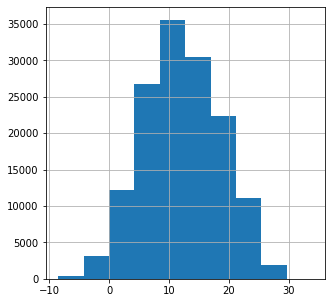

In [ ]:
_=data['MinTemp'].hist(figsize=(5, 5))

#### MaxTemp
The maximum temperature in degrees celsius.
Just like the previous histogram,
This histogram helps us understand the temperature prelevance distribution. We can clearly see a gaussian-like distribution and that a maximal temperature of about 20 degrees celcius was most common.

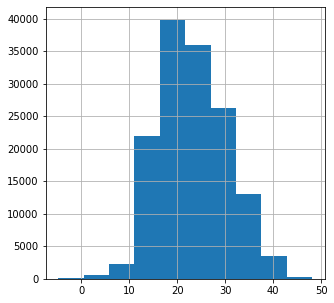

In [ ]:
_=data['MaxTemp'].hist(figsize=(5, 5))

#### Rainfall

The amount of rainfall recorded for the day in mm.

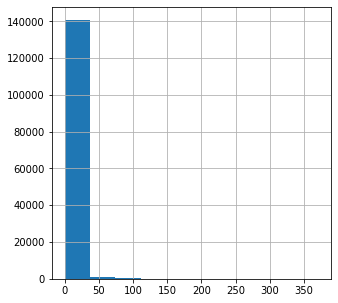

In [ ]:
_=data['Rainfall'].hist(figsize=(5, 5))

There might be probable outliers.
According to the Australian Bureau of Meteorology (BOM), 80% of the land receives less than 600 mm of rainfall annually and 50% has even less than 300 mm. This makes the observations having around 300 mm per single day very suspicious - this is almost the rain dose of an entire year!
 As a whole, Australia has a very low annual average rainfall of 419 mm (16 in).
Since such observations quantity is very low, and outliers can be part of life, we will leave them for now yet remember if further issues may arise.

**We will continue to briefly represent all of our data and their definitions:**

#### Evaporation

The so-called Class A pan evaporation (mm) in the 24 hours to 9am.

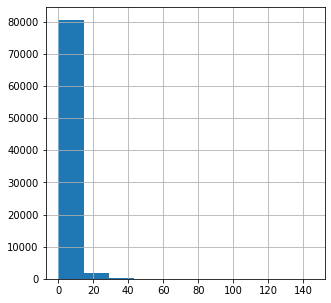

In [ ]:
_=data['Evaporation'].hist(figsize=(5, 5))

Just like previous histogram, probable outliers.

#### Sunshine

The number of hours of bright sunshine in the day.

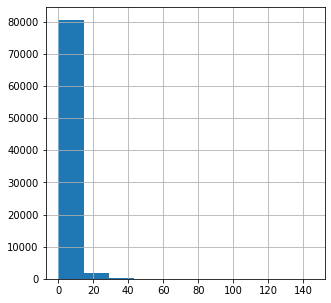

In [ ]:
_=data['Evaporation'].hist(figsize=(5, 5))

Probable outliers.

#### WindGustSpeed
The speed (km/h) of the strongest wind gust in the 24 hours to midnight.

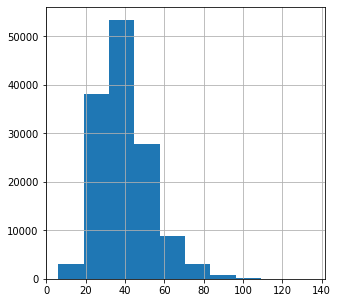

In [ ]:
_=data['WindGustSpeed'].hist(figsize=(5, 5))

Probable outliers.

#### WindSpeed9am

Wind speed (km/hr) averaged over 10 minutes prior to 9am.

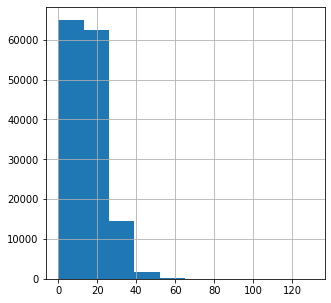

In [ ]:
_=data['WindSpeed9am'].hist(figsize=(5, 5))

Probable outliers.

#### WindSpeed3pm
Wind speed (km/hr) averaged over 10 minutes prior to 3pm.

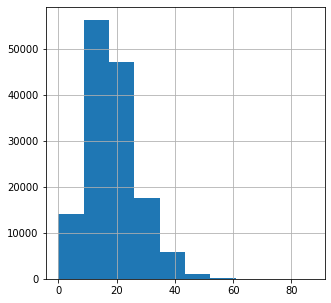

In [ ]:
_=data['WindSpeed3pm'].hist(figsize=(5, 5))

Probable outliers.

#### Humidity9am
Humidity (percent) at 9am.

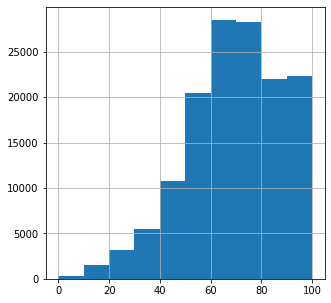

In [ ]:
_=data['Humidity9am'].hist(figsize=(5, 5))

#### Pressure9am
Atmospheric pressure (hpa) reduced to mean sea level at 9am.

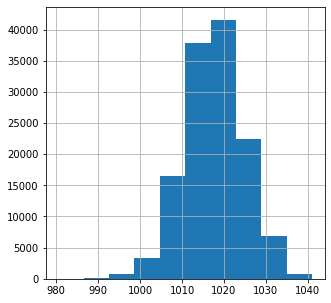

In [ ]:
_=data['Pressure9am'].hist(figsize=(5, 5))

Possible outliers.

#### Pressure3pm
Atmospheric pressure (hpa) reduced to mean sea level at 3pm.

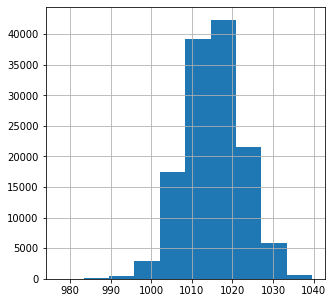

In [ ]:
_=data['Pressure3pm'].hist(figsize=(5, 5))

Possible outliers.

#### Cloud9am
Fraction of sky obscured by cloud at 9am. This is measured in “oktas”, which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.

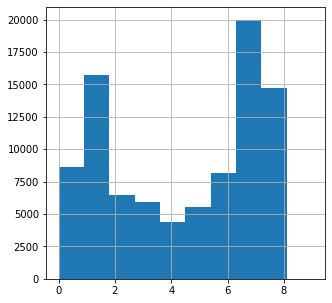

In [ ]:
_=data['Cloud9am'].hist(figsize=(5, 5))

Possible outliers.
In addition , this variable is known to show such distribution, where low and high cover are most common over medium.

#### Cloud3pm
Fraction of sky obscured by cloud (in “oktas”: eighths) at 3pm. See Cload9am for a description of the values.

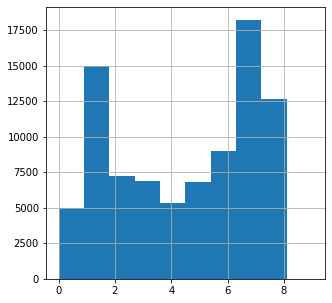

In [ ]:
_=data['Cloud3pm'].hist(figsize=(5, 5))

Possible outliers.

#### Temp9am

Temperature (degrees C) at 9am.

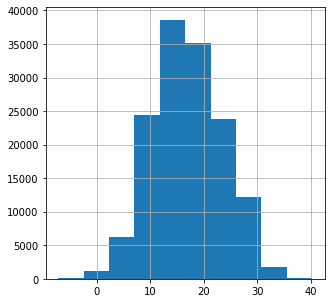

In [ ]:
_=data['Temp9am'].hist(figsize=(5, 5))

Possible outliers.

#### Temp3pm
Temperature (degrees C) at 3pm.

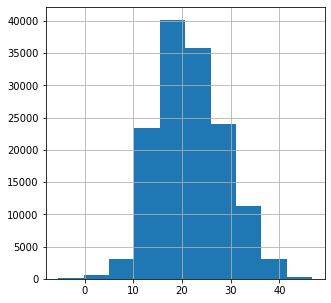

In [ ]:
_=data['Temp3pm'].hist(figsize=(5, 5))

Possible outliers.

#### Outliers

In [ ]:
data[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,DayOfMonth,DayOfYear
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,2012.769751,6.399615,15.712258,179.337405
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,2.537684,3.427262,8.794789,104.780922
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,2007.000000,1.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,2011.000000,3.000000,8.000000,88.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,2013.000000,6.000000,16.000000,176.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,2015.000000,9.000000,23.000000,270.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,2017.000000,12.000000,31.000000,366.000000


From this table we can see that some variables have outliers:
* Rainfall: max 371.0 for mean of 2.3 and std 8.47
* Evaporation: max 145.0 for mean of 5.46 and std of 4.19
* WindSpeed9am: max 130.0 for mean 14.04 and std 8.91
* WindSpeed3pm: max 87.0 for mean 18.66 and std 8.8

In [ ]:
outliers = ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm']

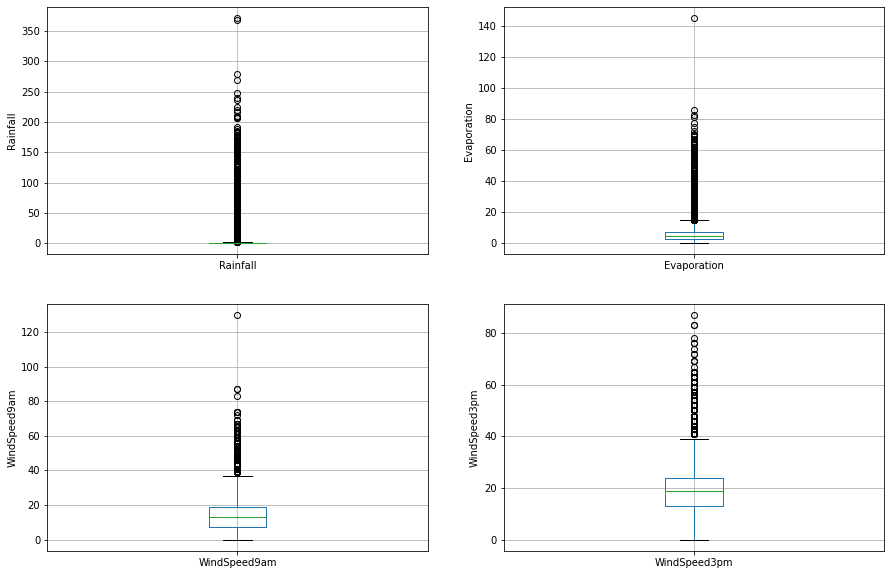

In [ ]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))
for idx, outlier in enumerate(outliers):
  plt.subplot(2, 2, idx+1)
  fig = data.boxplot(column=outlier)
  fig.set_ylabel(outlier)

plt.show()

From the value distribution histograms for these variables we see that they are highly skewed. Therefore, we cannot find the outlier boundaries using methods that require normal distribution. We'll find the boundaries using IQR method.

In [ ]:
def find_outlier_boundaries(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    lower=max(Q1-1.5*IQR,0)
    upper=Q3+1.5*IQR
    return lower, upper
  

In [ ]:
for column in outliers:
  lower, upper = find_outlier_boundaries(data[column])
  print(f'{column} upper boundary={upper:.2f} lower boundary={lower:.2f}')


Rainfall upper boundary=2.00 lower boundary=0.00
Evaporation upper boundary=14.60 lower boundary=0.00
WindSpeed9am upper boundary=37.00 lower boundary=0.00
WindSpeed3pm upper boundary=40.50 lower boundary=0.00


We see that we'll need to deal with upper boundary only

### Multivariate Analysis

#### Rainfall per Location

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<div class='tableauPlaceholder' id='viz1652712003286' style='position: relative'><noscript><a href='#'><img alt='RainFall Per Location ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ra&#47;RainFallinLocations&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='RainFallinLocations&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ra&#47;RainFallinLocations&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1652712003286');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>"))

#### Correlations Analysis

In [ ]:
def show_correlations_heatmap(df, title):
  corr_data=df.corr().abs()
  plt.figure(figsize=(16,12))
  plt.title(title)
  ax = sns.heatmap(corr_data, square=True, annot=True, fmt='.2f', linecolor='white')
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
  ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
  plt.show()
  return corr_data


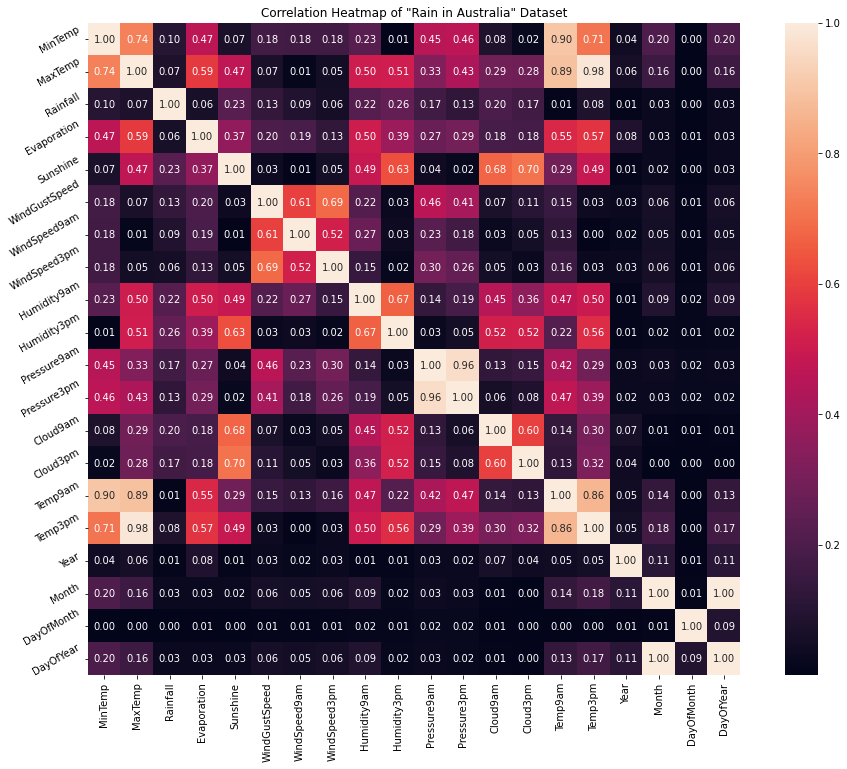

In [ ]:
corr_data=show_correlations_heatmap(data[numerical],'Correlation Heatmap of "Rain in Australia" Dataset')

Finding significant correlations (>0.7) - We can see for example that temperature variables highly correlate with each other.
This of course makes sense.
Same is true for pressure.

In [ ]:
# https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
sol = (corr_data.where(np.triu(np.ones(corr_data.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))
for i in range(len(sol)):
  if sol[i]<0.71:
    break
sol[:i]

Month        DayOfYear      0.996459
MaxTemp      Temp3pm        0.984503
Pressure9am  Pressure3pm    0.961326
MinTemp      Temp9am        0.901821
MaxTemp      Temp9am        0.887210
Temp9am      Temp3pm        0.860591
MinTemp      MaxTemp        0.736555
dtype: float64


We see that the following columns are highly correlated with one another , and therefore are superfluous:

* Temp9am
* Temp3pm
* Pressure3pm

In [ ]:
to_remove=['Temp9am','Temp3pm','Pressure3pm']

## **Feature Engineering**

### Remove Highly Correlated Attributes
 

In [ ]:
data.drop(to_remove,inplace= True,axis=1)

In [ ]:
numerical=[col for col in numerical if col not in to_remove]
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Cloud9am',
 'Cloud3pm',
 'Year',
 'Month',
 'DayOfMonth',
 'DayOfYear']

### Process the Missing Values

#### Remove Rows without Target Value

In [ ]:
data = data[data['RainTomorrow'].notna()]

In [ ]:
data['RainTomorrow'].isnull().sum()

0

#### Fill Missing Values with Location Median/Mode

As we know, we must fill our missing values before training any model. The choice of filling will affect the results and must be chosen cleverly.


In [ ]:
# if all location values are Nan, then we keep Nan - to be handled on global basis
# Otherwise, if variable is categorical, we use the most frequent value
f = lambda x: np.nan if x.isnull().all() else x.median() if np.issubdtype(x.dtype, np.number) else x.mode(dropna=False).head()[0] 
data.fillna(data.groupby('Location').transform(f),inplace=True)
# data[numerical].isnull().sum().sort_values()

In [ ]:
data[categorical].isnull().sum().sort_values()

Location           0
RainToday          0
RainTomorrow       0
WindDir3pm      2009
WindDir9am      4901
WindGustDir     7007
dtype: int64

We still have missing categorical values

In [ ]:
data[numerical].isnull().sum().sort_values()

MinTemp              0
Month                0
Year                 0
Humidity3pm          0
DayOfMonth           0
WindSpeed3pm         0
Humidity9am          0
Rainfall             0
MaxTemp              0
WindSpeed9am         0
DayOfYear            0
WindGustSpeed     5971
Pressure9am      11781
Cloud9am         34034
Cloud3pm         34034
Evaporation      44261
Sunshine         52071
dtype: int64

We still have missing numeric values

#### Fill Missing Numerical Values with Global Median

We chose to fill our missing values in the data mainly by their median.

This makes sence since average may be sensitive to strong outliers while median is more resistant to outliers.

In [ ]:
for col in numerical:
  if data[col].isnull().sum() > 0:
      data[col].fillna(data[col].median(), inplace=True) 
  
data[numerical].isnull().sum().sort_values()

MinTemp          0
Month            0
Year             0
Cloud3pm         0
Cloud9am         0
Pressure9am      0
Humidity3pm      0
DayOfMonth       0
Humidity9am      0
WindSpeed9am     0
WindGustSpeed    0
Sunshine         0
Evaporation      0
Rainfall         0
MaxTemp          0
WindSpeed3pm     0
DayOfYear        0
dtype: int64

#### Fill Missing Categorical Values with Global Mode

The mode is a statistical term that represents the most common value in a dataset. Filling missing values with the mode is a common practice when dealing with categorical data where values are not numerical, and it does not make sense (or even possible) to straightforward calculate the mean or median.

In [ ]:
for col in categorical:
  if data[col].isnull().sum() > 0:
    data[col]=data[col].fillna(data[col].mode().head()[0]) 

In [ ]:
data[categorical].isnull().sum().sort_values()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

### Process Outliers

In [ ]:
# Replace outliers with upper boundary
for column in outliers:
  _, upper = find_outlier_boundaries(data[column])
  data.loc[data[column] > upper, column] = upper
 

### Replace Categorical Variables with One Hot Encoding

Now we use One hot encoding - which is a commonly used technique for converting categorical data into a numerical format, as we've seen in class and in previous assignments.

 It is used to represent categorical data in a way that can be easily used in our models.

In [ ]:
bkp=data.copy()

In [ ]:
# data=bkp.copy()

In [ ]:
dummies=[pd.get_dummies(data[column], drop_first=True, prefix=column) for column in categorical]
frames=[data[numerical]]+dummies
processed_data=pd.concat(frames, axis=1)
processed_data.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE', 'WindDir3pm_SSW',
       'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW', 'WindDir3pm_WSW',
       'RainToday_Yes', 'RainTomorrow_Yes'],
      dtype='object', length=112)

In [ ]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Columns: 112 entries, MinTemp to RainTomorrow_Yes
dtypes: float64(7), int64(6), object(4), uint8(95)
memory usage: 32.4+ MB


In [ ]:
# Last check to see we have no Nan values:
processed_data.isnull().values.any()

False

## **Dividing to Train, Validation and Test**

In [ ]:
# Divide the data to Train (10%), Validation (20% of remaining 90%), Test (80% of remaining 90%)

X = processed_data.drop(['RainTomorrow_Yes'], axis=1)
Y = processed_data['RainTomorrow_Yes']

X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.10, random_state=0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.17, random_state=0)

In [ ]:
# Checking the sizes of the Train, Validation, Test
 
print(f"X_test.shape = {X_test.shape} ({type(X_test).__name__})")
print(f"Y_test.shape = {Y_test.shape} ({type(Y_test).__name__})")
print(f"X_val.shape = {X_val.shape} ({type(X_val).__name__})")
print(f"Y_val.shape = {Y_val.shape} ({type(Y_val).__name__})")
print(f"X_train.shape = {X_train.shape} ({type(X_train).__name__})")
print(f"Y_train.shape = {Y_train.shape} ({type(Y_train).__name__})")

print(f'percentage of validation to train = {((Y_val.shape[0]/Y_train.shape[0])*100)} %')
print(f'percentage of test to train + validation = {(Y_test.shape[0]/Y_train_val.shape[0])*100} %')

X_test.shape = (14220, 111) (DataFrame)
Y_test.shape = (14220,) (Series)
X_val.shape = (21756, 111) (DataFrame)
Y_val.shape = (21756,) (Series)
X_train.shape = (106217, 111) (DataFrame)
Y_train.shape = (106217,) (Series)
percentage of validation to train = 20.48259694775789 %
percentage of test to train + validation = 11.11171887820087 %


In [ ]:
# Normalize numerical data columns according to the train
X_train_normalized = X_train.copy()
X_val_normalized = X_val.copy()
X_test_normalized = X_test.copy()


for column in numerical:
  col_mean = X_train[column].mean()
  col_std = X_train[column].std()
  X_train_normalized[column] = (X_train[column] - col_mean) / (col_std + 0.00001)
  X_val_normalized[column] = (X_val[column] - col_mean) / (col_std + 0.00001)
  X_test_normalized[column] = (X_test[column] - col_mean) / (col_std + 0.00001)


In [ ]:
def get_device():
  return torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

def to_tensor(a):
  return torch.from_numpy(a.to_numpy()).float().to(get_device())

def df_to_tensor(df):
  a=df.to_numpy()
  a_=np.vstack(a).astype(float)
  return torch.from_numpy(a_).float().to(get_device())



In [ ]:
X_train_normalized = df_to_tensor(X_train_normalized)
X_val_normalized = df_to_tensor(X_val_normalized)
X_test_normalized = df_to_tensor(X_test_normalized)
Y_train = to_tensor(Y_train)
Y_val = to_tensor(Y_val)
Y_test = to_tensor(Y_test)


In [ ]:
X_train_normalized.shape

torch.Size([106217, 111])

## **Limitations**

As we addressed before, our main limitations are:

1. Many NaN values - we had filled a high number of NaN values.
This of course impairs our data authenticity, and poses a challenge for our model. Yet, filling these values is usually better than elminating entire observations.
We also chose to fill it using Medians and Global Mode (most common) which should be less sensitive to outliers, and helps us to keep other data the was not NaN and train our model on it.

2. Biased data - Our data is mostly composed of not raining the next day data (Hence- true labled No). This is an issue to be aware of since we automatically reach about 78% of correct prediction if we always predict No. Beyond the infilictions on our model which may challenge us, we also obviously cannot change this data share. We certainly won't balance the data by omitting observations, and would rather remember our bias reference of prediction success.

## **Models**

For our predictions, we used 4 different models:

1.   Multi Layer Perceptron (MLP)
2.   RNN
3.   GRU
4.   LSTM

**First, let's intoduce the model's functions:**

### Functions for model training

#### get_accuracy

In [ ]:
def get_accuracy(model, x_train, y_train, batch_size=50):
    """Compute the model accuracy on the data set."""

    inputs_num = x_train.shape[1]
    n = x_train.shape[0]
    correct = 0
    N = 0

    for i in range(0, n, batch_size):
        x_train_batch = x_train[i:i + batch_size]
        y_train_batch = y_train[i:i + batch_size]
        pred = model(x_train_batch)
        if torch.cuda.is_available():
          pred = pred.detach().cpu().numpy()
        else:
          pred = pred.detach().numpy()
        pred = np.round(pred)
        res = y_train_batch.cpu().numpy()
        correct += np.sum(pred == res)
        N += y_train_batch.shape[0]
        if N > 10000:
            break
    return correct / N

#### train_model_cuda

In [ ]:
def train_model_cuda (model,criterion, x_train, y_train,x_val, y_val,
                                 batch_size=1000,learning_rate=0.001,weight_decay=0,
                                 max_iters=1000,
                                 checkpoint_path=None):


    optimizer = optim.Adam(model.parameters(),
                           lr=learning_rate,
                           weight_decay=weight_decay)
    iters, losses = [], []
    iters_sub, train_accs, val_accs  = [], [] ,[] 
    
    k = 0 # Number of iterations
    while True:
        for i in range(0, x_train.shape[0], batch_size):
            if (i + batch_size) > x_train.shape[0]:
                break
            
            x_train_batch = x_train[i:i + batch_size]

            if torch.cuda.is_available():
              x_train_batch = x_train_batch.cuda()
              model.cuda()
              result_train = model(x_train_batch).cuda()
              y_train_batch = y_train[i:i + batch_size].cuda()
            else:
              result_train = model(x_train_batch)
              y_train_batch = y_train[i:i + batch_size]
            # print('criterion',result_train.shape,y_train_batch.shape)
            loss = criterion(result_train,y_train_batch.unsqueeze(1))  
            optimizer.zero_grad()      
            loss.backward()                   
            optimizer.step() 
            iters.append(k)
            losses.append(float(loss))  

            if max_iters % 50 == 0:
               
                if torch.cuda.is_available():
                  train_cost = float(loss.detach().cpu().numpy())
                  train_acc = get_accuracy(model, x_train.cuda(), y_train.cuda(), batch_size)
                  valid_acc = get_accuracy(model, x_val.cuda(), y_val.cuda(), batch_size)
                else:
                  train_cost = float(loss.detach().numpy())
                  train_acc = get_accuracy(model, x_train, y_train, batch_size)
                  valid_acc = get_accuracy(model, x_val, y_val, batch_size)

                iters_sub.append(k)
                train_accs.append(train_acc)

                val_accs.append(valid_acc)
                # print("Iter %d. [Val Acc %.2f%%] [Train Acc %.2f%% , Loss %f]" % (k, valid_acc * 100, train_acc * 100, train_cost))

                if (checkpoint_path is not None) and k > 0:
                    torch.save(model.state_dict(), checkpoint_path.format(k))

            # increment the iteration number
            k += 1

            if k > max_iters:
                return iters, losses, iters_sub, train_accs, val_accs, result_train             


#### plot_learning_curve

In [ ]:
def get_chart_name(title):
  return os.path.join(PROJECT_PATH,'charts',title+'.png')

def save_chart(title):
  path=get_chart_name(title)
  plt.savefig(path)
  # print(f'Saved {path}')

def plot_learning_curve(title,should_save_chart,iters, losses, iters_sub, train_accs, val_accs, last_pred):
    figure, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,9))
    figure.suptitle(title)
    ax1.set_title("Learning Curve: Loss per Iteration")
    ax1.plot(iters, losses, label="Train ")
    ax1.set_xlabel("Iterations")
    ax1.set_ylabel("Loss")
     
    ax2.set_title("Learning Curve: Accuracy per Iteration")
    ax2.plot(iters_sub, train_accs, label="Train")
    ax2.plot(iters_sub, val_accs, label="Validation")
    ax2.set_xlabel("Iterations")
    ax2.set_ylabel("Accuracy")
    ax2.legend(loc='best')

    if should_save_chart:
      save_chart(title)
    else:
     plt.show()
    plt.close()
            

In [ ]:
def mean_val(iters, losses, iters_sub, train_accs, val_accs, last_pred):
  mean_val = np.mean(val_accs[-10:]) # Takes last 10 numbers
  last_ten_slope = (val_accs[-1] - val_accs[-10])/(iters_sub[-1] - iters_sub[-10]) # Meant to give the slope to see if it positive, currently not in use
  return mean_val

#### evaluate_model

In [ ]:
from functools import wraps
import time

# Timing decorator
def timeit(func):
    @wraps(func)
    def timeit_wrapper(*args, **kwargs):
        start_time = time.perf_counter()
        result = func(*args, **kwargs)
        end_time = time.perf_counter()
        total_time = end_time - start_time
        # print(f'Function {func.__name__}{args} {kwargs} Took {total_time:.4f} seconds')
        print(f'Function {func.__name__} Took {total_time:.4f} seconds')
        return result
    return timeit_wrapper

In [ ]:
# Add result of test with specific hyper parameters to summary results

def add_class_to_report(new_row, report, name):
  d={f'{name}-{k}':v for k,v in report[name].items()}
  new_row.update(d)

def add_report(new_row, report):
  new_row["accuracy"]=report["accuracy"]
  add_class_to_report(new_row, report, "No rain")
  add_class_to_report(new_row, report, "Raining")

def update_results(results,model_name,criterion_name, hidden_num1, learning_rate, n_layers, max_iters,report):
  new_row={
      'Model':model_name,
      'Criterion':criterion_name,
      'Hidden Num':hidden_num1,
      'Learning Rate':learning_rate,
      'N layers': n_layers,
      'Epochs': max_iters
  }
  add_report(new_row,report)
  return results.append(new_row, ignore_index=True)



In [ ]:
# Helper functions for evaluate_model
def make_title(model_name,criterion_name,hidden_num1,learning_rate,n_layers,max_iters):
  return f'model={model_name} criterion = {criterion_name} hidden_num1 = {hidden_num1}, learning_rate = {learning_rate} n_layers={n_layers} max_iters={max_iters}'

def make_results_name(model_class, suffix):
  return model_class.__name__+suffix

In [ ]:


@timeit
def evaluate_model_step(model_class,criterion,hidden_num1,learning_rate,n_layers, max_iters, should_save_chart, results):
  model_name=model_class.__name__
  criterion_name=type(criterion).__name__
  title=make_title(model_name,criterion_name,hidden_num1,learning_rate,n_layers,max_iters)
  print(title)
  model = model_class(inputs_num = inputs_num ,hidden_num1 = hidden_num1, n_layers=n_layers)
  if torch.cuda.is_available():
    model=model.cuda()
  model=model.to(get_device())
  learning_curve_info = train_model_cuda(model,criterion, X_train_normalized, Y_train,X_val_normalized, Y_val,
                                batch_size=batch_size ,learning_rate=learning_rate,
                                weight_decay=weight_decay,
                                max_iters=max_iters,
                                checkpoint_path=None)        
  plot_learning_curve(title,should_save_chart,*learning_curve_info)
  report=test_model(model) 
  return update_results(results, model_name,criterion_name, hidden_num1, learning_rate, n_layers, max_iters,report)

  
@timeit
def evaluate_model(model_class, criteria_list, hidden_num1_list, learning_rate_list, n_layers = 3, max_iters=2500, should_save_chart=True, should_save_results=True, suffix=''):
  step_count=len(criteria_list)*len(hidden_num1_list)*len(learning_rate_list)
  step=1
  results=pd.DataFrame()
  for criterion_class in criteria_list:
    criterion=criterion_class().to(get_device())
    criterion_name=type(criterion).__name__
    for hidden_num1 in hidden_num1_list:
      for learning_rate in learning_rate_list:
        print(f'{step} of {step_count}', end =" ")
        results=evaluate_model_step(model_class,criterion,hidden_num1,learning_rate,n_layers, max_iters, should_save_chart, results)  
        step+=1      
  if should_save_results:
    results_name=make_results_name(model_class, suffix)
    save_results(results,results_name)
  return results

  
  


#### test_model

In [ ]:
def tensor_to_numpy(t):
  return t.cpu().detach().numpy() 


def test_model(model):
  y_pred = model(X_test_normalized)
  y_pred_binary=y_pred.ge(.5) # We convert every value below 0.5 to 0. Otherwise, we set it to 1.
  Y_test_array=tensor_to_numpy(Y_test)
  y_pred_binary_array=tensor_to_numpy(y_pred_binary)
  return classification_report(Y_test_array, y_pred_binary_array, target_names=['No rain', 'Raining'], output_dict=True)




#### find_best_params

We select run(s) with best accuracy, Rain F1-score, and No Rain F1-score

In [ ]:
def make_results_path(name):
  return os.path.join(PROJECT_PATH,'results',name+".csv")

def save_results(df, name):
  path=make_results_path(name)
  with open(path, 'w', encoding = 'utf-8-sig') as f:
    df.to_csv(f)

def load_results(name):
  path=make_results_path(name)
  return pd.read_csv(path)


In [ ]:
def display_table(df):
  display(HTML(df.to_html(index=False)))


def get_column_values(row,name,column):
  values=row[f'{name}-{column}'].values
  return values[0]

def get_row_value(row,column):
  return row[column].values[0]


In [ ]:
def make_classificication_report_title(row):
  columns=['Criterion','Hidden Num',	'Learning Rate'	,'N layers']
  elements=[f'{col}={get_row_value(row,col)}' for col in columns]
  return '\n'+' '.join(elements)

def display_classificication_report(row):
  outputs=['Raining','No rain']
  columns=['precision','recall','f1-score','support']
  data={" ":outputs}
  for column in columns:
    data[column]=[get_column_values(row,name, column) for name in outputs]
  df=pd.DataFrame.from_dict(data)
  display_table(df)
  print(f"accuracy={get_row_value(row,'accuracy')}")


In [ ]:
def get_row_value_int(row,column):
  value = get_row_value(row,column)
  return int(value) if column in ['Hidden Num','N layers'] else value

def get_chart_name_(row, max_iters):
  columns=['Model','Criterion','Hidden Num',  'Learning Rate',  'N layers']
  values=[get_row_value_int(row,column) for column in columns]+[max_iters]
  return make_title(*values)

def dispaly_chart_by_name(chart_name):
  path=get_chart_name(chart_name)

  img = cv.imread(path)
  cv2_imshow(img) # display an image

def display_chart(row, max_iters):
  chart_name=get_chart_name_(row,max_iters)
  dispaly_chart_by_name(chart_name)


In [ ]:
def display_classificication_report_and_chart(row_, needs_title, max_iters):
  row = row_[~row_.index.duplicated(keep='first')]
  if needs_title:
     print(make_classificication_report_title(row))
  display_classificication_report(row)
  display_chart(row, max_iters)


def display_best_params_summary(best_params, max_iters):
  print("Model with the best metrics used the following hyper parameters:")
  params=best_params[['Metric','Criterion',  'Hidden Num',  'Learning Rate',  'N layers']]
  params = params.astype({"Hidden Num":"int","N layers":"int"})
  display_table(params)
  indices = set(best_params.index)
  for idx in indices:
    row=best_params.loc[[idx]]
    display_classificication_report_and_chart(row, needs_title=len(indices)>1, max_iters=max_iters)

  
def find_best_params_by_column(results, name):
  best_row=results.query(f'`{name}` == `{name}`.max()')
  best_row['Metric']=name
  return best_row



In [ ]:
def get_int_from_suffix(suffix:str):
  return int(suffix.replace('_',''))



In [ ]:
def get_existing_results_name(model_class, suffix):
  results_name=make_results_name(model_class, suffix)
  return results_name if os.path.exists(make_results_path(results_name)) else make_results_name(model_class,suffix='')

def find_best_params(model_class, suffix=''):
  max_iters_=get_int_from_suffix(suffix) if suffix else max_iters
  results_name=get_existing_results_name(model_class, suffix)
  results=load_results(results_name)
  metrics=['accuracy','Raining-f1-score','No rain-f1-score']
  rows=[find_best_params_by_column(results, metric) for metric in metrics]
  best_params=pd.concat(rows,axis=0)
  display_best_params_summary(best_params, max_iters_)
  return best_params

### Global variables for all runs

In [ ]:
# Variables for all runs to select best hyper parameters

inputs_num = X_test.shape[1]
hidden_num1_list = [16,32,64]
batch_size = 512
weight_decay = 0
max_iters = 2500
learning_rate_list =  [0.001,  0.0005, 0.0001]
criteria_list=[nn.BCELoss, nn.MSELoss]


### Model 1 - Multi Layer Perceptron (MLP)


As we learned during the course, a MLP model consists of at least three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function.

The input layer receives the input data, and each hidden layer applies a nonlinear transformation to the data, which allows the network to learn complex patterns and relationships in the data. The output layer produces the network's output.

MLP utilizes backpropagation for training.

One important issue in ML is **choosing hyper-parameters**.
These paramteres are not part of the model's trained weights.
Alternatively, they should be smartly chosen by us.

Before selecting which different parameters we want to test, we gave a few first runs to "feel" the area which should affect most.

**Learning rate:** This is the step size used to update the weights and biases during training. It determines how quickly the model learns from the data and can be adjusted to balance between convergence speed and stability.
Learning rate optimization is usually made as try and test, from The values we tried are: [0.001,  0.0005, 0.0001], and the best match varied between the models.

**Batch size:** This determines the number of samples used in each forward and backward pass during training. It affects the convergence speed and memory usage during training.
We used 512 in all of our model. We saw that a large number and in the power of 2 corresponds well (Improves hardware performance). More so, a relativley large batch size contributes to future models (RNN, GRU, LMST).

**Number of epochs:** This is the number of times the entire training dataset is used during training. It affects the model's generalization performance and can be adjusted to balance between overfitting and underfitting. The best choice and its reason will be further explaind.

**Losses:**
The loss function measures the discrepancy between the model's predictions and the true labels. For classification tasks, cross-entropy loss is commonly used, as we choce to try together with MSE.

**Optimizers:**
Optimizers are used to update the weights and biases of the neurons during training to minimize the loss function.

In our assignment we chose to use Adam optimizer from a positive previous experience. This optimizer was also introduced to us during the course lectures.

We chose Adam since it can usually adjust the learning rate  well based on the gradient of the loss function. This can be useful in meteorology data, such as in our case. In meteorology data characteristics of the weather patterns can change over time, and the optimizer needs to be able to adapt to these changes.

Adam (short for Adaptive Moment Estimation) is a type of stochastic gradient descent (SGD) optimizer that computes individual adaptive learning rates for different parameters from estimates of first and second moments of the gradients.

**We've searched our best parameters in the next chapter.**

Loss functions that are tested include:

**BCEloss** - stands for Binary Cross-Entropy Loss, which is a commonly used loss function in binary classification tasks, and therefore suited our needs as classification of Yes or No (1 or 0).

  In binary classification, the output of the model is a single scalar value that represents the probability of the positive class. The BCEloss can be defined as:

$ BCEloss = -[y*log(p) + (1-y)*log(1-p)] $

where $y$ is the true binary label (0 or 1), $p$ is the predicted probability of the positive class (between 0 and 1), and $log$ is the natural logarithm.

**MSE loss**, or Mean Squared Error loss - a commonly used loss function in regression tasks to measure the difference between the predicted and true continuous values. It is defined as the average of the squared differences between the predicted and true values. It is the most basic loss function and usually deserves a test, therefoe we tried it in our model.

  The formula for MSE loss is:

$ MSEloss = (1/n) * Σ(y - ŷ)^2 $

where $y$ is the true value, $ŷ$ is the predicted value, and n is the number of samples.

The MSE loss penalizes the model more for larger differences between the predicted and true values. It is sensitive to outliers and can result in higher errors for extreme values.

We've also used **ReLU** and **Sigmoid as our activition function**, from previous positive experience with them, and since sigmoid maps any input value to a value between 0 and 1, making it useful for our case where the output needs to be interpreted as Yes or No eventually.

#### MLP 2-layers Evaluation

In [ ]:
class MLP_2_Layers(nn.Module):
  def __init__(self, inputs_num, hidden_num1 = 50, n_layers=3):
    # n_layers is defined for compatibility with other models
    super(MLP_2_Layers, self).__init__()
    self.inputs_num = inputs_num
    self.hidden_num1 = hidden_num1

    self.fc1 = nn.Linear(inputs_num ,hidden_num1)
    self.fc2 = nn.Linear(hidden_num1, 1)

  def forward(self, x):
    x = self.fc1(x)
    x = torch.relu(x)
    x = self.fc2(x)
    x = torch.sigmoid(x)
    return x

##### **Ready to start evaluation**

Using 1500 epochs

In [ ]:

_=evaluate_model(MLP_2_Layers, criteria_list=criteria_list, \
               hidden_num1_list=hidden_num1_list,  learning_rate_list=learning_rate_list, max_iters=1500, suffix='_1500')

1 of 18 model=MLP_2_Layers criterion = BCELoss hidden_num1 = 16, learning_rate = 0.001 n_layers=3 max_iters=1500
Function evaluate_model_step Took 53.2310 seconds
2 of 18 model=MLP_2_Layers criterion = BCELoss hidden_num1 = 16, learning_rate = 0.0005 n_layers=3 max_iters=1500
Function evaluate_model_step Took 53.2386 seconds
3 of 18 model=MLP_2_Layers criterion = BCELoss hidden_num1 = 16, learning_rate = 0.0001 n_layers=3 max_iters=1500
Function evaluate_model_step Took 51.5777 seconds
4 of 18 model=MLP_2_Layers criterion = BCELoss hidden_num1 = 32, learning_rate = 0.001 n_layers=3 max_iters=1500
Function evaluate_model_step Took 51.6429 seconds
5 of 18 model=MLP_2_Layers criterion = BCELoss hidden_num1 = 32, learning_rate = 0.0005 n_layers=3 max_iters=1500
Function evaluate_model_step Took 52.3614 seconds
6 of 18 model=MLP_2_Layers criterion = BCELoss hidden_num1 = 32, learning_rate = 0.0001 n_layers=3 max_iters=1500
Function evaluate_model_step Took 51.0498 seconds
7 of 18 model=MLP_

Using 2500 epochs

In [ ]:
_=evaluate_model(MLP_2_Layers, criteria_list=criteria_list, \
               hidden_num1_list=hidden_num1_list,  learning_rate_list=learning_rate_list, max_iters=2500, suffix='_2500')

1 of 18 model=MLP_2_Layers criterion = BCELoss hidden_num1 = 16, learning_rate = 0.001 n_layers=3 max_iters=2500
Function evaluate_model_step Took 83.2073 seconds
2 of 18 model=MLP_2_Layers criterion = BCELoss hidden_num1 = 16, learning_rate = 0.0005 n_layers=3 max_iters=2500
Function evaluate_model_step Took 82.9850 seconds
3 of 18 model=MLP_2_Layers criterion = BCELoss hidden_num1 = 16, learning_rate = 0.0001 n_layers=3 max_iters=2500
Function evaluate_model_step Took 81.9607 seconds
4 of 18 model=MLP_2_Layers criterion = BCELoss hidden_num1 = 32, learning_rate = 0.001 n_layers=3 max_iters=2500
Function evaluate_model_step Took 83.3390 seconds
5 of 18 model=MLP_2_Layers criterion = BCELoss hidden_num1 = 32, learning_rate = 0.0005 n_layers=3 max_iters=2500
Function evaluate_model_step Took 82.6289 seconds
6 of 18 model=MLP_2_Layers criterion = BCELoss hidden_num1 = 32, learning_rate = 0.0001 n_layers=3 max_iters=2500
Function evaluate_model_step Took 83.2475 seconds
7 of 18 model=MLP_

Using 1000 epochs

In [ ]:
_=evaluate_model(MLP_2_Layers, criteria_list=criteria_list, \
               hidden_num1_list=hidden_num1_list,  learning_rate_list=learning_rate_list, max_iters=1000, suffix='_1000')

1 of 18 model=MLP_2_Layers criterion = BCELoss hidden_num1 = 16, learning_rate = 0.001 n_layers=3 max_iters=1000
Function evaluate_model_step Took 33.6226 seconds
2 of 18 model=MLP_2_Layers criterion = BCELoss hidden_num1 = 16, learning_rate = 0.0005 n_layers=3 max_iters=1000
Function evaluate_model_step Took 33.1047 seconds
3 of 18 model=MLP_2_Layers criterion = BCELoss hidden_num1 = 16, learning_rate = 0.0001 n_layers=3 max_iters=1000
Function evaluate_model_step Took 33.4455 seconds
4 of 18 model=MLP_2_Layers criterion = BCELoss hidden_num1 = 32, learning_rate = 0.001 n_layers=3 max_iters=1000
Function evaluate_model_step Took 32.8208 seconds
5 of 18 model=MLP_2_Layers criterion = BCELoss hidden_num1 = 32, learning_rate = 0.0005 n_layers=3 max_iters=1000
Function evaluate_model_step Took 33.5346 seconds
6 of 18 model=MLP_2_Layers criterion = BCELoss hidden_num1 = 32, learning_rate = 0.0001 n_layers=3 max_iters=1000
Function evaluate_model_step Took 32.6909 seconds
7 of 18 model=MLP_

In [ ]:
_=evaluate_model(MLP_2_Layers, criteria_list=criteria_list, \
               hidden_num1_list=hidden_num1_list,  learning_rate_list=learning_rate_list, max_iters=4000, suffix='_4000')

1 of 18 model=MLP_2_Layers criterion = BCELoss hidden_num1 = 16, learning_rate = 0.001 n_layers=3 max_iters=4000
Function evaluate_model_step Took 136.6264 seconds
2 of 18 model=MLP_2_Layers criterion = BCELoss hidden_num1 = 16, learning_rate = 0.0005 n_layers=3 max_iters=4000
Function evaluate_model_step Took 131.5636 seconds
3 of 18 model=MLP_2_Layers criterion = BCELoss hidden_num1 = 16, learning_rate = 0.0001 n_layers=3 max_iters=4000
Function evaluate_model_step Took 132.1398 seconds
4 of 18 model=MLP_2_Layers criterion = BCELoss hidden_num1 = 32, learning_rate = 0.001 n_layers=3 max_iters=4000
Function evaluate_model_step Took 134.3477 seconds
5 of 18 model=MLP_2_Layers criterion = BCELoss hidden_num1 = 32, learning_rate = 0.0005 n_layers=3 max_iters=4000
Function evaluate_model_step Took 130.5968 seconds
6 of 18 model=MLP_2_Layers criterion = BCELoss hidden_num1 = 32, learning_rate = 0.0001 n_layers=3 max_iters=4000
Function evaluate_model_step Took 131.9599 seconds
7 of 18 mode

##### Intermediate Analysis

To conserve resource, we would like to use only one value for max_iters (number of epochs)

In [ ]:
accuracy_df=pd.DataFrame(columns=['Number of epochs','Accuracy'])

In [ ]:
def find_best_params_for_max_iters(model_class,max_iters,accuracy_df):
  best_params=find_best_params(model_class,suffix=f'_{max_iters}')
  accuracy=best_params['accuracy'].max()
  return accuracy_df.append({'Number of epochs':max_iters,'Accuracy':accuracy},ignore_index=True) 

Model with the best metrics used the following hyper parameters:


Metric,Criterion,Hidden Num,Learning Rate,N layers
accuracy,BCELoss,64,0.001,3
Raining-f1-score,BCELoss,64,0.001,3
No rain-f1-score,BCELoss,64,0.001,3


,precision,recall,f1-score,support
Raining,0.743162,0.553822,0.634672,3140.0
No rain,0.882071,0.945758,0.912805,11080.0


accuracy=0.859212376933896


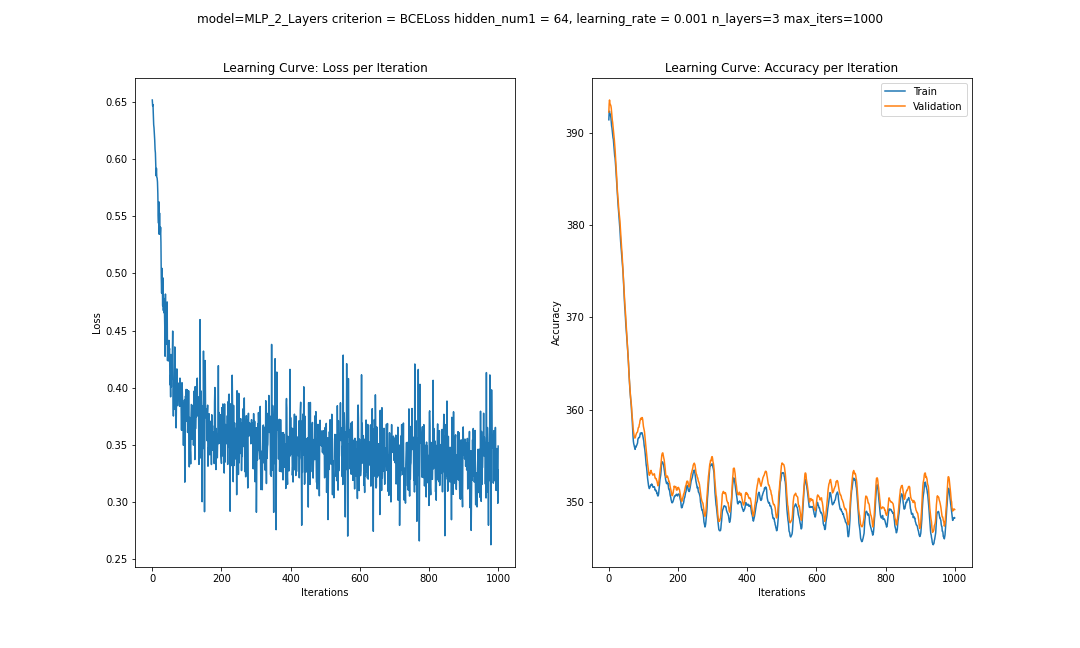

In [ ]:

accuracy_df=find_best_params_for_max_iters(MLP_2_Layers,1000,accuracy_df)

Model with the best metrics used the following hyper parameters:


Metric,Criterion,Hidden Num,Learning Rate,N layers
accuracy,MSELoss,64,0.001,3
Raining-f1-score,MSELoss,64,0.001,3
No rain-f1-score,MSELoss,64,0.001,3


,precision,recall,f1-score,support
Raining,0.743892,0.562420,0.640551,3140.0
No rain,0.884011,0.945126,0.913548,11080.0


accuracy=0.860618846694796


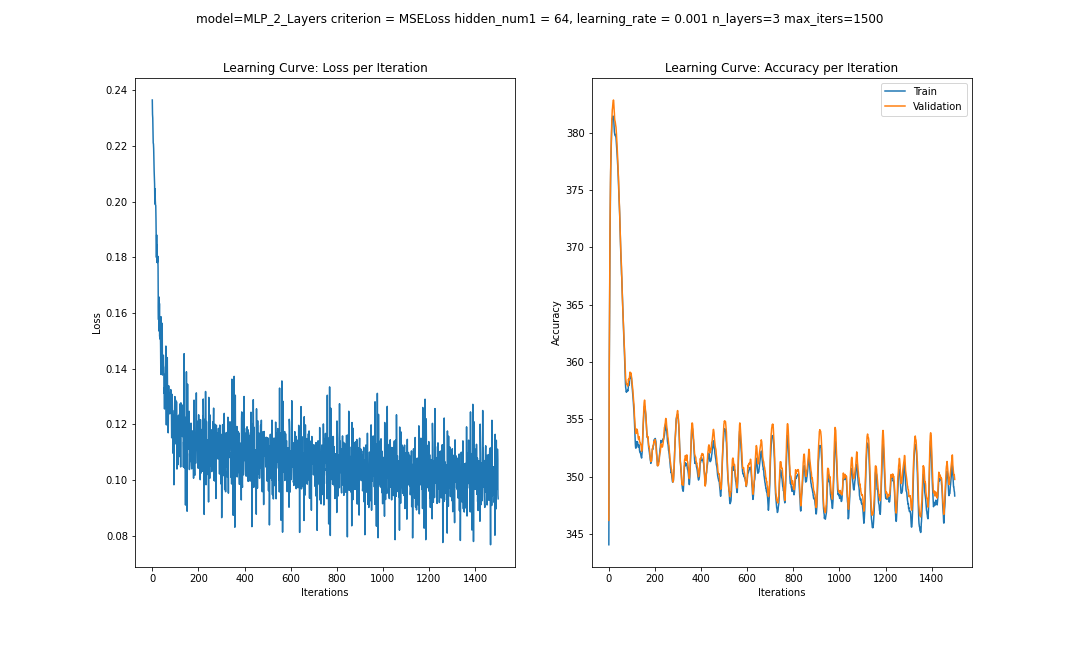

In [ ]:
accuracy_df=find_best_params_for_max_iters(MLP_2_Layers,1500,accuracy_df)

Model with the best metrics used the following hyper parameters:


Metric,Criterion,Hidden Num,Learning Rate,N layers
accuracy,BCELoss,64,0.001,3
Raining-f1-score,BCELoss,64,0.001,3
No rain-f1-score,BCELoss,64,0.001,3


,precision,recall,f1-score,support
Raining,0.767329,0.553503,0.643108,3140.0
No rain,0.882727,0.952437,0.916258,11080.0


accuracy=0.8643459915611814


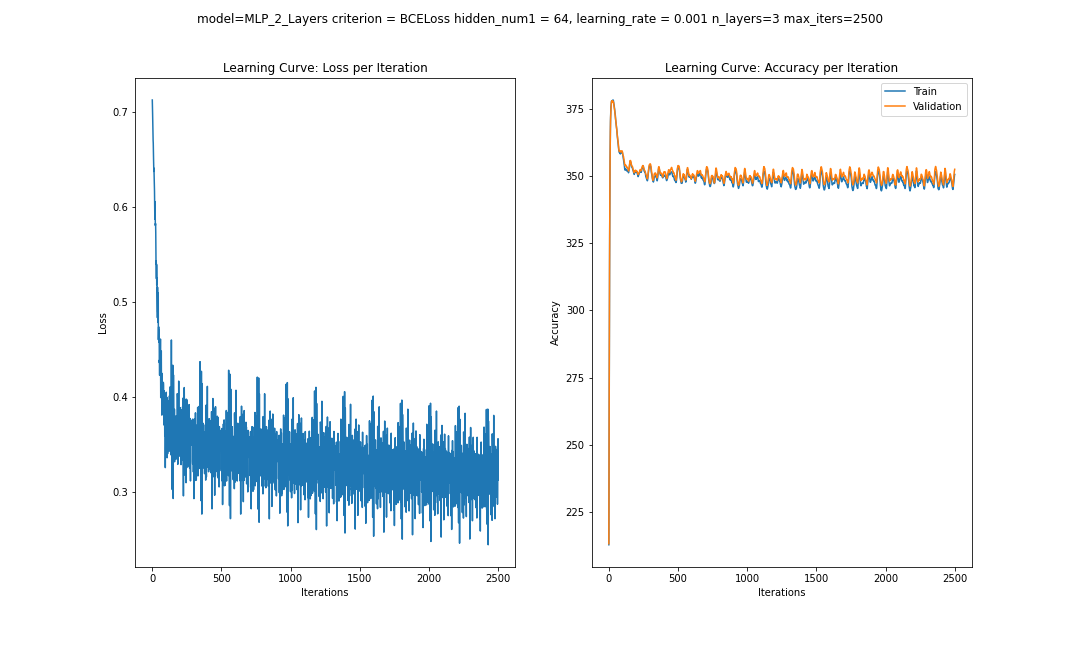

In [ ]:
accuracy_df=find_best_params_for_max_iters(MLP_2_Layers,2500,accuracy_df)

Model with the best metrics used the following hyper parameters:


Metric,Criterion,Hidden Num,Learning Rate,N layers
accuracy,BCELoss,64,0.001,3
accuracy,MSELoss,64,0.001,3
Raining-f1-score,BCELoss,64,0.001,3
No rain-f1-score,MSELoss,64,0.001,3



Criterion=BCELoss Hidden Num=64.0 Learning Rate=0.001 N layers=3.0


,precision,recall,f1-score,support
Raining,0.743270,0.589172,0.657310,3140.0
No rain,0.890035,0.942329,0.915436,11080.0


accuracy=0.8643459915611814


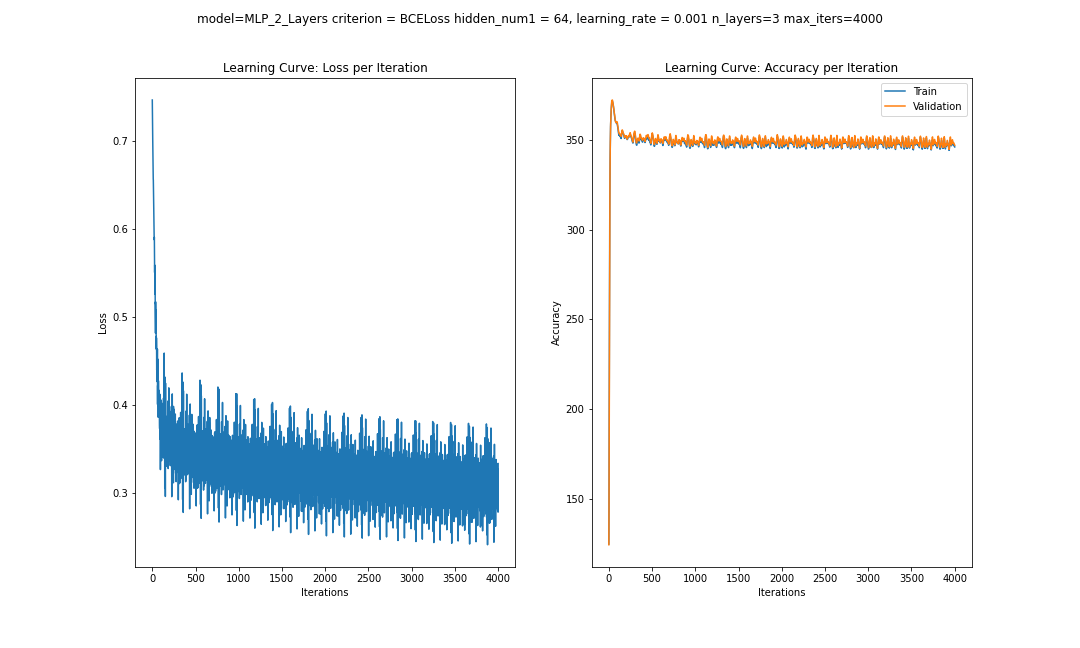


Criterion=MSELoss Hidden Num=64.0 Learning Rate=0.001 N layers=3.0


,precision,recall,f1-score,support
Raining,0.743858,0.588217,0.656945,3140.0
No rain,0.889836,0.942599,0.915458,11080.0


accuracy=0.8643459915611814


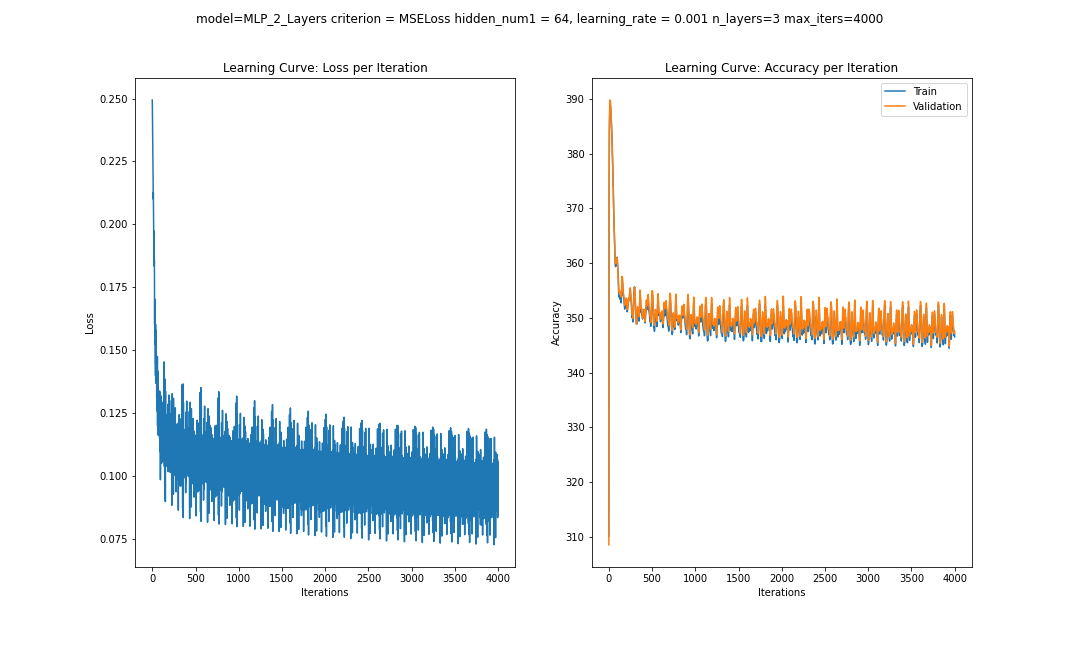

In [ ]:
accuracy_df=find_best_params_for_max_iters(MLP_2_Layers,4000,accuracy_df)

#### **First Discussion**

We noted the learning cruve results, and that it had a strong peak in the first iterations, which is unexpected.
Usually, the learning curve climbs up until it reaches convergence.

This issue repeates itself in the next learning curves as well, at least to some extent which is less dominant as it is here.
We can explain this issue by recalling that our data is **un-biased** and by predicting No at the begginning, we may reach a very good results until our model encounters an observation labled with Yes. This is again, since it is likley to encounter a "No" streak at the beggining of our training as 78% of the data is labled "No".

We do note that the loss learning curve does show very well that our model succeeds in learning and is drastically reduced over itertions.

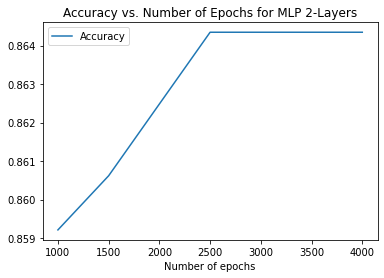

In [ ]:
_=accuracy_df.plot(x='Number of epochs',y='Accuracy',title='Accuracy vs. Number of Epochs for MLP 2-Layers')

We see that increasing number of epochs from 2500 to 4000 does not improve accuracy.

This phenomenon is know to us from the course and is called convergence.

Convergence occurs when the model has learned all it can from the training data, and further training does not improve its performance. This can be observed in the learning curve as a plateau or flattening of the curve, where the validation or test performance of the model does not improve with additional training epochs or data.

We aim to catch the curve at its "knee" as it is the best tradeoff between actual accuarcy and training work time.

**Therefore, we'll use 2500 for the rest of our runs, as it seems to be the sufficient number in our case.**

In [ ]:
summary_df=pd.DataFrame() # Table to compare models

In [ ]:
def update_summary(model_class,summary_df,max_iters=2500):
  best_params=find_best_params(model_class,suffix=f'_{max_iters}')
  return pd.concat([summary_df, best_params])


Model with the best metrics used the following hyper parameters:


Metric,Criterion,Hidden Num,Learning Rate,N layers
accuracy,BCELoss,64,0.001,3
Raining-f1-score,BCELoss,64,0.001,3
No rain-f1-score,BCELoss,64,0.001,3


,precision,recall,f1-score,support
Raining,0.767329,0.553503,0.643108,3140.0
No rain,0.882727,0.952437,0.916258,11080.0


accuracy=0.8643459915611814


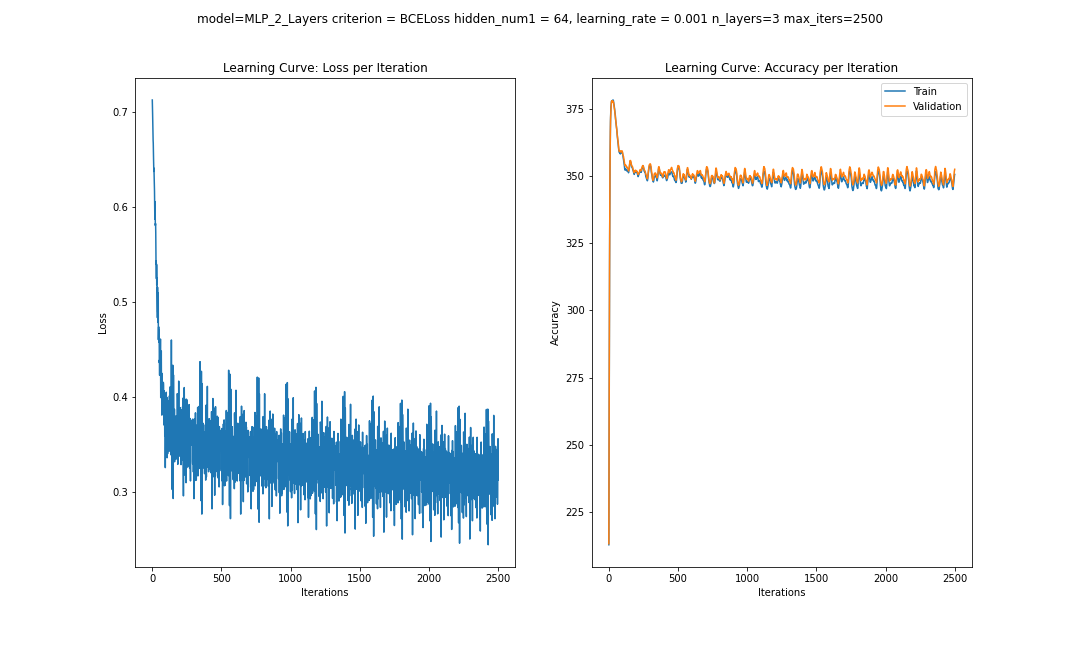

In [ ]:
summary_df=update_summary(MLP_2_Layers,summary_df)

#### MLP 3-Layers Evaluation

In [ ]:
class MLP_3_Layers(nn.Module):
    def __init__(self, inputs_num, hidden_num1 = 50, n_layers=3):
     # n_layers is defined for compatibility with other models
        super(MLP_3_Layers, self).__init__()
        self.inputs_num = inputs_num
        self.hidden_num1 = hidden_num1

        self.fc1 = nn.Linear(inputs_num ,hidden_num1//2)
        self.fc2 = nn.Linear(hidden_num1//2, hidden_num1//4)
        self.fc3 = nn.Linear(hidden_num1//4, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        x = torch.relu(x)
        x = self.fc3(x)
        x = torch.sigmoid(x)
        return x

In [ ]:
_=evaluate_model(MLP_3_Layers, criteria_list=criteria_list, hidden_num1_list=hidden_num1_list,  learning_rate_list=learning_rate_list)

1 of 18 model=MLP_3_Layers criterion = BCELoss hidden_num1 = 16, learning_rate = 0.001 n_layers=3 max_iters=2500
Function evaluate_model_step Took 97.9815 seconds
2 of 18 model=MLP_3_Layers criterion = BCELoss hidden_num1 = 16, learning_rate = 0.0005 n_layers=3 max_iters=2500
Function evaluate_model_step Took 93.4127 seconds
3 of 18 model=MLP_3_Layers criterion = BCELoss hidden_num1 = 16, learning_rate = 0.0001 n_layers=3 max_iters=2500
Function evaluate_model_step Took 91.8846 seconds
4 of 18 model=MLP_3_Layers criterion = BCELoss hidden_num1 = 32, learning_rate = 0.001 n_layers=3 max_iters=2500
Function evaluate_model_step Took 93.7563 seconds
5 of 18 model=MLP_3_Layers criterion = BCELoss hidden_num1 = 32, learning_rate = 0.0005 n_layers=3 max_iters=2500
Function evaluate_model_step Took 92.7587 seconds
6 of 18 model=MLP_3_Layers criterion = BCELoss hidden_num1 = 32, learning_rate = 0.0001 n_layers=3 max_iters=2500
Function evaluate_model_step Took 93.7355 seconds
7 of 18 model=MLP_

Model with the best metrics used the following hyper parameters:


Metric,Criterion,Hidden Num,Learning Rate,N layers
accuracy,MSELoss,64,0.001,3
Raining-f1-score,BCELoss,32,0.001,3
No rain-f1-score,MSELoss,64,0.001,3



Criterion=BCELoss Hidden Num=32.0 Learning Rate=0.001 N layers=3.0


,precision,recall,f1-score,support
Raining,0.736710,0.560510,0.636643,3140.0
No rain,0.883357,0.943231,0.912313,11080.0


accuracy=0.8587201125175808


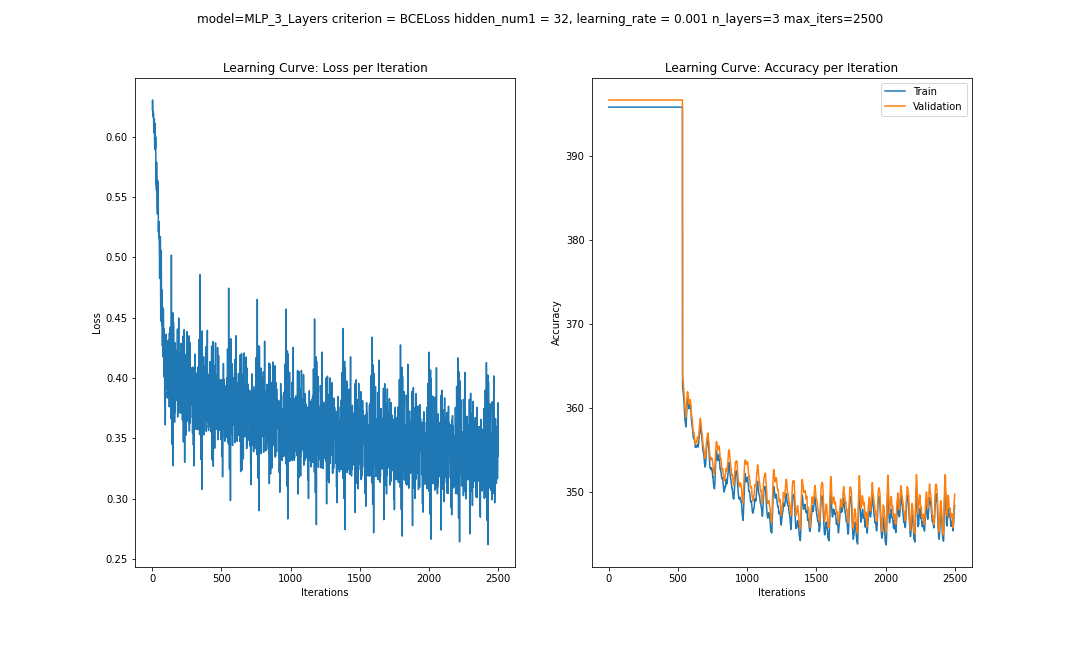


Criterion=MSELoss Hidden Num=64.0 Learning Rate=0.001 N layers=3.0


,precision,recall,f1-score,support
Raining,0.762887,0.542038,0.633774,3140.0
No rain,0.880057,0.952256,0.914734,11080.0


accuracy=0.8616736990154712


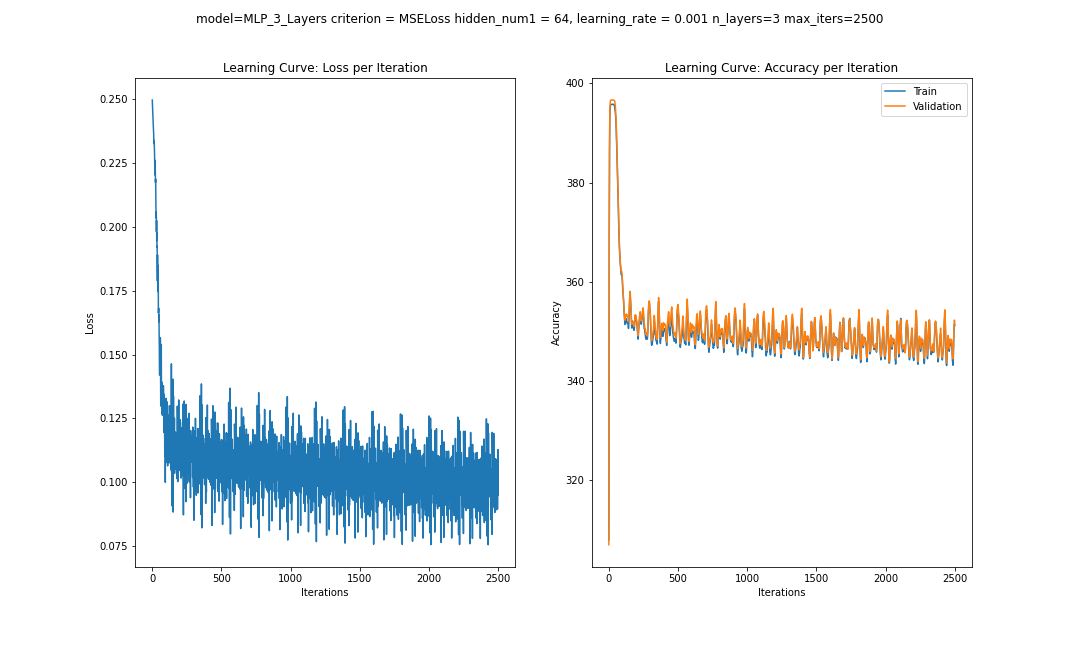

In [ ]:
summary_df=update_summary(MLP_3_Layers,summary_df)

#### MLP 4-Layers

In [ ]:
class MLP_4_Layers(nn.Module):
    def __init__(self, inputs_num, hidden_num1 = 50, n_layers=3):
      # n_layers is defined for compatibility with other models
        super(MLP_4_Layers, self).__init__()
        self.inputs_num = inputs_num
        self.hidden_num1 = hidden_num1

        self.fc1 = nn.Linear(inputs_num ,hidden_num1)
        self.fc2 = nn.Linear(hidden_num1, hidden_num1//2)
        self.fc3 = nn.Linear(hidden_num1//2, hidden_num1//4)
        self.fc4 = nn.Linear(hidden_num1//4, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        x = torch.relu(x)
        x = self.fc3(x)
        x = torch.relu(x)
        x = self.fc4(x)
        x = torch.sigmoid(x)
        return x

In [ ]:
_=evaluate_model(MLP_4_Layers, criteria_list=criteria_list, hidden_num1_list=hidden_num1_list,  learning_rate_list=learning_rate_list)

1 of 18 model=MLP_4_Layers criterion = BCELoss hidden_num1 = 16, learning_rate = 0.001 n_layers=3 max_iters=2500
Function evaluate_model_step Took 100.1581 seconds
2 of 18 model=MLP_4_Layers criterion = BCELoss hidden_num1 = 16, learning_rate = 0.0005 n_layers=3 max_iters=2500
Function evaluate_model_step Took 99.7493 seconds
3 of 18 model=MLP_4_Layers criterion = BCELoss hidden_num1 = 16, learning_rate = 0.0001 n_layers=3 max_iters=2500
Function evaluate_model_step Took 101.7302 seconds
4 of 18 model=MLP_4_Layers criterion = BCELoss hidden_num1 = 32, learning_rate = 0.001 n_layers=3 max_iters=2500
Function evaluate_model_step Took 98.1546 seconds
5 of 18 model=MLP_4_Layers criterion = BCELoss hidden_num1 = 32, learning_rate = 0.0005 n_layers=3 max_iters=2500
Function evaluate_model_step Took 98.8027 seconds
6 of 18 model=MLP_4_Layers criterion = BCELoss hidden_num1 = 32, learning_rate = 0.0001 n_layers=3 max_iters=2500
Function evaluate_model_step Took 97.8249 seconds
7 of 18 model=ML

Model with the best metrics used the following hyper parameters:


Metric,Criterion,Hidden Num,Learning Rate,N layers
accuracy,BCELoss,64,0.0010,3
Raining-f1-score,MSELoss,64,0.0010,3
No rain-f1-score,MSELoss,64,0.0005,3



Criterion=MSELoss Hidden Num=64.0 Learning Rate=0.0005 N layers=3.0


,precision,recall,f1-score,support
Raining,0.762095,0.546815,0.636751,3140.0
No rain,0.881090,0.951625,0.915000,11080.0


accuracy=0.8622362869198312


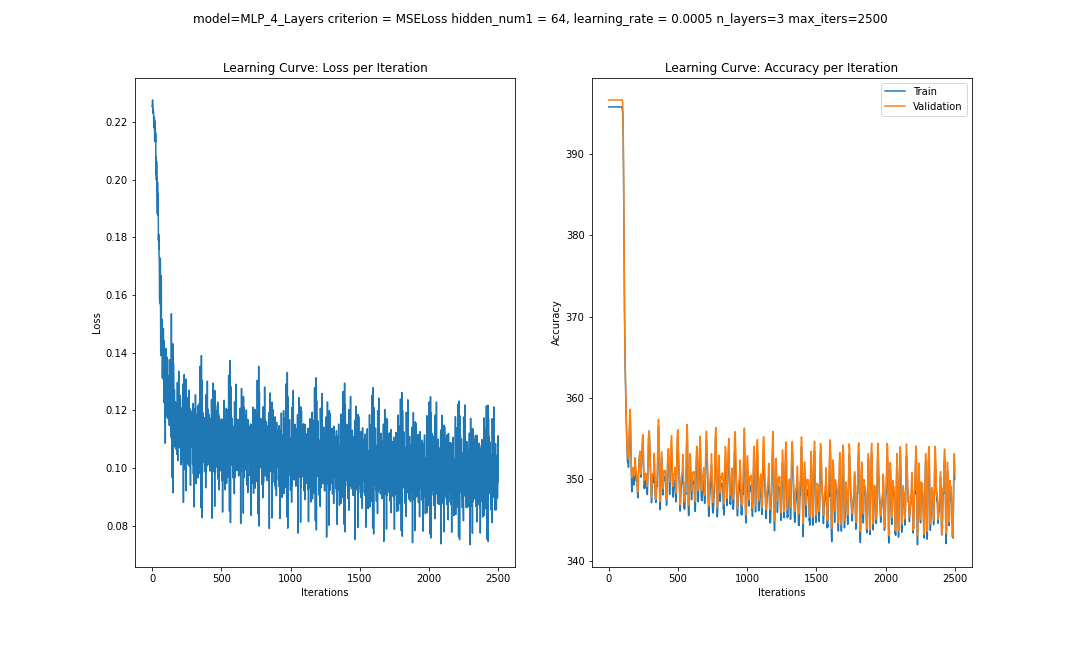


Criterion=BCELoss Hidden Num=64.0 Learning Rate=0.001 N layers=3.0


,precision,recall,f1-score,support
Raining,0.741843,0.579299,0.650572,3140.0
No rain,0.887746,0.942870,0.914478,11080.0


accuracy=0.8625879043600563


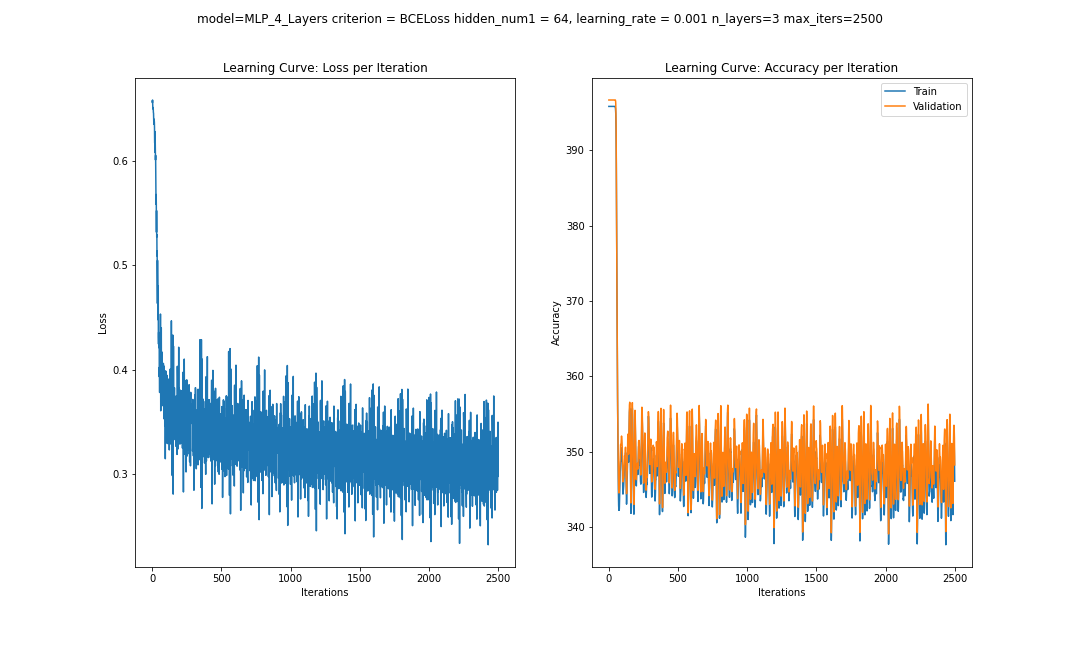


Criterion=MSELoss Hidden Num=64.0 Learning Rate=0.001 N layers=3.0


,precision,recall,f1-score,support
Raining,0.735200,0.585350,0.651773,3140.0
No rain,0.888908,0.940253,0.913860,11080.0


accuracy=0.8618846694796062


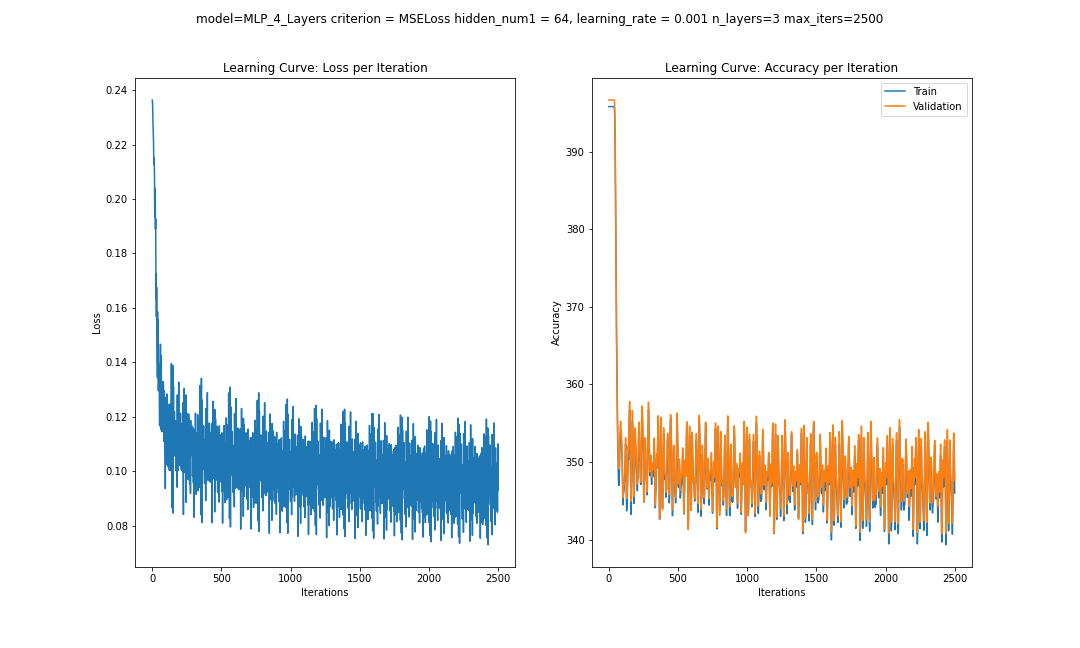

In [ ]:
summary_df=update_summary(MLP_4_Layers,summary_df)

#### MLP 3-Layers Leaky RLU

In [ ]:
class MLP_3_Layers_leaky_relu(nn.Module):
    def __init__(self, inputs_num, hidden_num1 = 50, n_layers=3):
     # n_layers is defined for compatibility with other models
        super(MLP_3_Layers_leaky_relu, self).__init__()
        self.inputs_num = inputs_num
        self.hidden_num1 = hidden_num1

        self.fc1 = nn.Linear(inputs_num ,hidden_num1//2)
        self.fc2 = nn.Linear(hidden_num1//2, hidden_num1//4)
        self.fc3 = nn.Linear(hidden_num1//4, 1)


    def forward(self, x):
        x = self.fc1(x)
        x = torch.nn.functional.leaky_relu(x)
        x = self.fc2(x)
        x = torch.nn.functional.leaky_relu(x)
        x = self.fc3(x)
        x = torch.sigmoid(x)
        return x

In [ ]:
_=evaluate_model(MLP_3_Layers_leaky_relu, criteria_list=criteria_list, hidden_num1_list=hidden_num1_list,  learning_rate_list=learning_rate_list)

1 of 18 model=MLP_3_Layers_leaky_relu criterion = BCELoss hidden_num1 = 16, learning_rate = 0.001 n_layers=3 max_iters=2500
Function evaluate_model_step Took 92.2367 seconds
2 of 18 model=MLP_3_Layers_leaky_relu criterion = BCELoss hidden_num1 = 16, learning_rate = 0.0005 n_layers=3 max_iters=2500
Function evaluate_model_step Took 93.1333 seconds
3 of 18 model=MLP_3_Layers_leaky_relu criterion = BCELoss hidden_num1 = 16, learning_rate = 0.0001 n_layers=3 max_iters=2500
Function evaluate_model_step Took 93.2257 seconds
4 of 18 model=MLP_3_Layers_leaky_relu criterion = BCELoss hidden_num1 = 32, learning_rate = 0.001 n_layers=3 max_iters=2500
Function evaluate_model_step Took 93.1370 seconds
5 of 18 model=MLP_3_Layers_leaky_relu criterion = BCELoss hidden_num1 = 32, learning_rate = 0.0005 n_layers=3 max_iters=2500
Function evaluate_model_step Took 94.2777 seconds
6 of 18 model=MLP_3_Layers_leaky_relu criterion = BCELoss hidden_num1 = 32, learning_rate = 0.0001 n_layers=3 max_iters=2500
Fu

Model with the best metrics used the following hyper parameters:


Metric,Criterion,Hidden Num,Learning Rate,N layers
accuracy,MSELoss,64,0.001,3
Raining-f1-score,BCELoss,64,0.001,3
No rain-f1-score,MSELoss,64,0.001,3



Criterion=BCELoss Hidden Num=64.0 Learning Rate=0.001 N layers=3.0


,precision,recall,f1-score,support
Raining,0.757737,0.545860,0.634580,3140.0
No rain,0.880749,0.950542,0.914315,11080.0


accuracy=0.8611814345991561


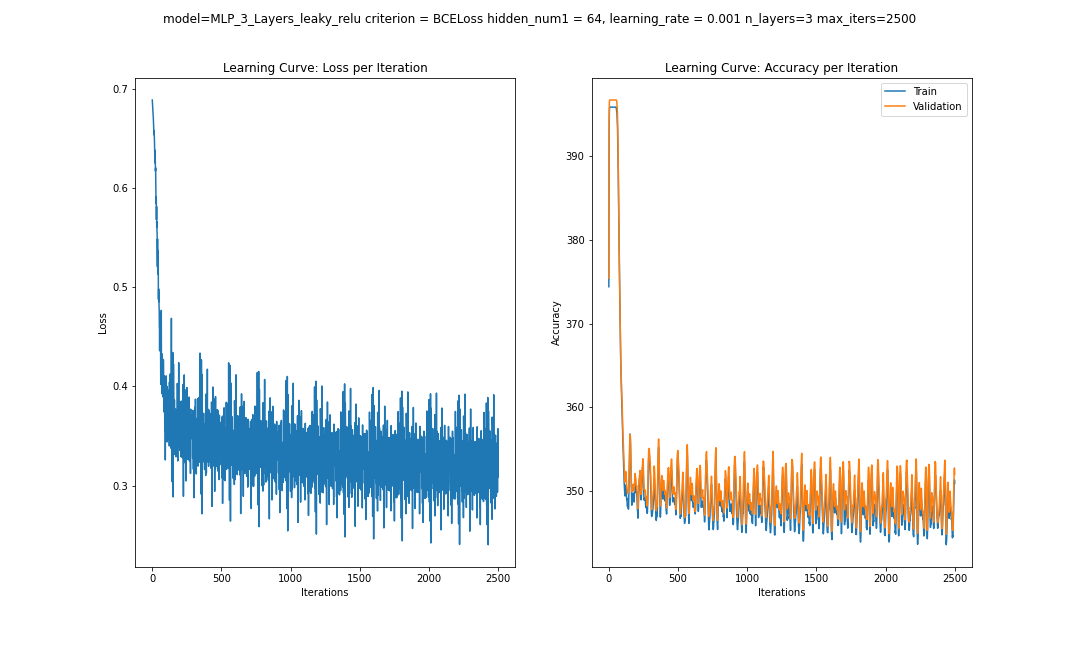


Criterion=MSELoss Hidden Num=64.0 Learning Rate=0.001 N layers=3.0


,precision,recall,f1-score,support
Raining,0.763726,0.540446,0.632973,3140.0
No rain,0.879730,0.952617,0.914724,11080.0


accuracy=0.8616033755274262


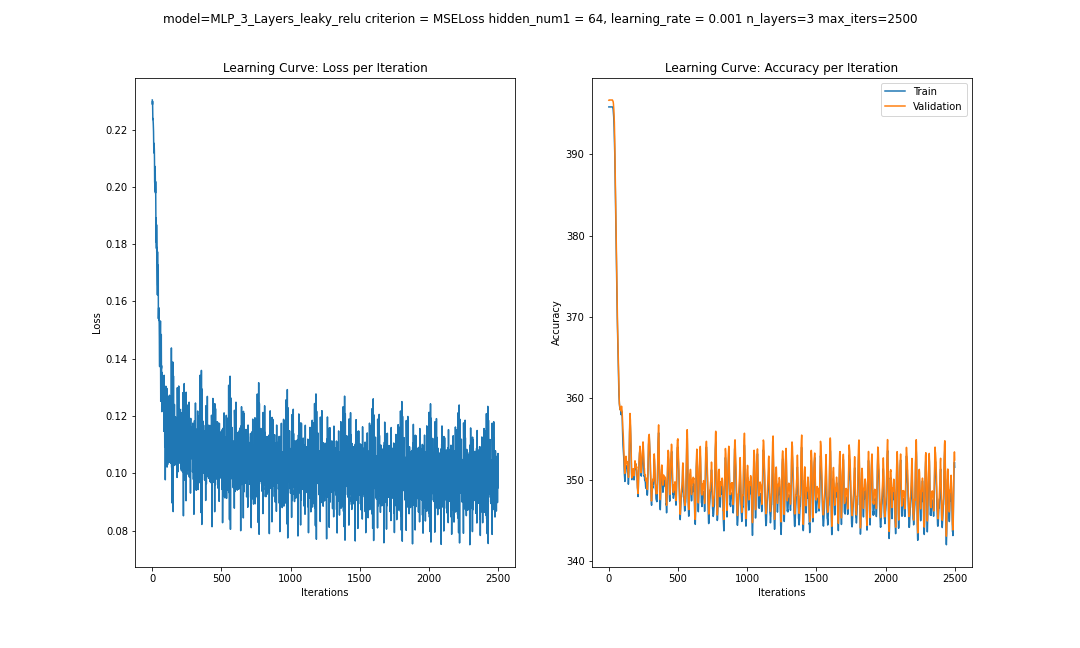

In [ ]:
summary_df=update_summary(MLP_3_Layers_leaky_relu,summary_df)

#### Results

We also attempted different output layers but the sigmoid was the best one.
We can see 3 paramters is the best.
Our model corressponds well to the training compared to validation, but The training results are not the best, probably because of the pre process.


*  leaky relu didn't help a lot.
*  In order to improve the model further / different pre-process has to be done.




#### **Mid-Conclusions: MLP**

Surprisingly, 2 layers model had the best results so far.
A possible explanation for this may be that while more layers enhances the capabillity to learn more complex model, they also raise the potential to overfit the training data. 2 layers on the other hand are simpler, and possess less weights (parameters to train). Therfore the model is less prone to overfit the training data and learn overfitting patterns that do not generalize well to new data. Of course full overfitting did not seem to actually occur here but perhaps more relativley to one another, in such way that made more layers slightly impair the results.

Moreover, the optimal number of layers for a neural network also depends on the complexity of the dataset. So if our dataset seem to be rather of a simpler kind, it may not require a deeper network and may even be better suited to a shallower architecture.

### Model 2 - RNN

As learned in class, RNN stands for Recurrent Neural Network, which is a type of neural network architecture that is well-suited for processing sequential data, such as time-series data or natural language text.

Giving a first guess, RNNs can be very suitable for weather forecasting because they are able to process time-series data, which is a key aspect of weather data, due to seasons effect described above.

One of the main advantages of RNNs for weather forecasting is their ability to capture memory temporal dependencies in the data. This is particularly important for weather data, and especially in our case of data spanning over 10 years.

Therfore RNNs seem as a promising approach for our goal and we were keen to give it a try.

RNN illustration from the lectures:

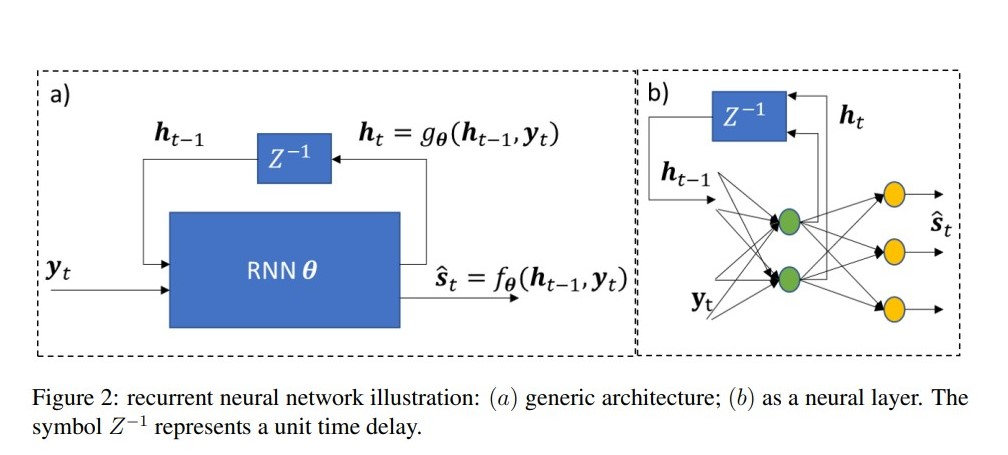

In [ ]:
class RNN_n_Layers(nn.Module):
      def __init__(self, inputs_num, hidden_num1 = 50, n_layers = 3):
        super(RNN_n_Layers, self).__init__()

        # Defining some parameters
        self.hidden_num1 = hidden_num1
        n_layers = n_layers - 1
        self.n_layers = n_layers

        #Defining the layers
        # RNN Layer
        self.rnn = nn.RNN(inputs_num, hidden_num1//4, n_layers, batch_first=True)   
        # Fully connected layer
        self.fc = nn.Linear(hidden_num1//4, 1)
    
      def forward(self, x):
        
        # Passing in the input and hidden state into the model and obtaining outputs
        out, hidden = self.rnn(x)
        
        # Reshaping the outputs such that it can be fit into the fully connected layer
        out = self.fc(out)
        out = torch.sigmoid(out)
        
        return out


In [ ]:


_=evaluate_model(RNN_n_Layers, criteria_list=criteria_list, hidden_num1_list=hidden_num1_list,  learning_rate_list=learning_rate_list)

1 of 18 model=RNN_n_Layers criterion = BCELoss hidden_num1 = 16, learning_rate = 0.001 n_layers=3 max_iters=2500
Function evaluate_model_step Took 190.5485 seconds
2 of 18 model=RNN_n_Layers criterion = BCELoss hidden_num1 = 16, learning_rate = 0.0005 n_layers=3 max_iters=2500
Function evaluate_model_step Took 187.7924 seconds
3 of 18 model=RNN_n_Layers criterion = BCELoss hidden_num1 = 16, learning_rate = 0.0001 n_layers=3 max_iters=2500
Function evaluate_model_step Took 187.4667 seconds
4 of 18 model=RNN_n_Layers criterion = BCELoss hidden_num1 = 32, learning_rate = 0.001 n_layers=3 max_iters=2500
Function evaluate_model_step Took 187.9226 seconds
5 of 18 model=RNN_n_Layers criterion = BCELoss hidden_num1 = 32, learning_rate = 0.0005 n_layers=3 max_iters=2500
Function evaluate_model_step Took 189.1444 seconds
6 of 18 model=RNN_n_Layers criterion = BCELoss hidden_num1 = 32, learning_rate = 0.0001 n_layers=3 max_iters=2500
Function evaluate_model_step Took 187.7205 seconds
7 of 18 mode

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Function evaluate_model_step Took 187.3306 seconds
13 of 18 model=RNN_n_Layers criterion = MSELoss hidden_num1 = 32, learning_rate = 0.001 n_layers=3 max_iters=2500
Function evaluate_model_step Took 187.2723 seconds
14 of 18 model=RNN_n_Layers criterion = MSELoss hidden_num1 = 32, learning_rate = 0.0005 n_layers=3 max_iters=2500
Function evaluate_model_step Took 187.2450 seconds
15 of 18 model=RNN_n_Layers criterion = MSELoss hidden_num1 = 32, learning_rate = 0.0001 n_layers=3 max_iters=2500
Function evaluate_model_step Took 184.5837 seconds
16 of 18 model=RNN_n_Layers criterion = MSELoss hidden_num1 = 64, learning_rate = 0.001 n_layers=3 max_iters=2500
Function evaluate_model_step Took 186.8490 seconds
17 of 18 model=RNN_n_Layers criterion = MSELoss hidden_num1 = 64, learning_rate = 0.0005 n_layers=3 max_iters=2500
Function evaluate_model_step Took 186.6711 seconds
18 of 18 model=RNN_n_Layers criterion = MSELoss hidden_num1 = 64, learning_rate = 0.0001 n_layers=3 max_iters=2500
Functi

Model with the best metrics used the following hyper parameters:


Metric,Criterion,Hidden Num,Learning Rate,N layers
accuracy,BCELoss,64,0.001,3
Raining-f1-score,BCELoss,64,0.001,3
No rain-f1-score,BCELoss,64,0.001,3


,precision,recall,f1-score,support
Raining,0.744560,0.544904,0.629275,3140.0
No rain,0.880138,0.947022,0.912355,11080.0


accuracy=0.8582278481012658


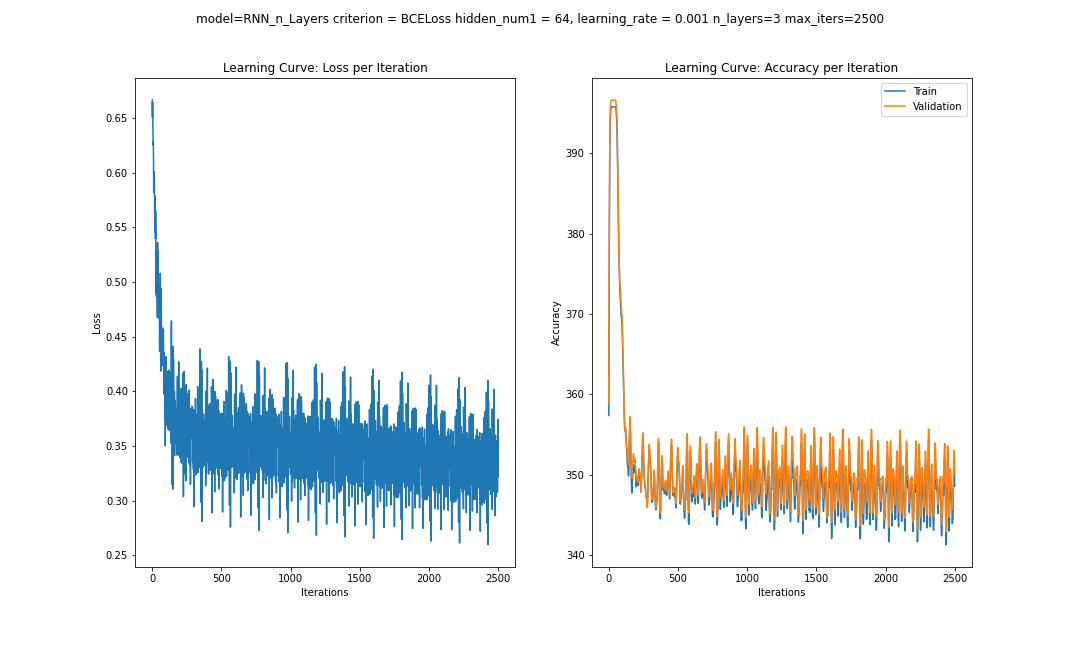

In [ ]:
summary_df=update_summary(RNN_n_Layers,summary_df)

Additional try to see whether wider hidden layer will improve results

In [ ]:

_=evaluate_model(RNN_n_Layers, criteria_list=criteria_list, hidden_num1_list=[128],  learning_rate_list=learning_rate_list)

1 of 6 model=RNN_n_Layers criterion = BCELoss hidden_num1 = 128, learning_rate = 0.001 n_layers=3 max_iters=2500
Function evaluate_model_step Took 174.1711 seconds
2 of 6 model=RNN_n_Layers criterion = BCELoss hidden_num1 = 128, learning_rate = 0.0005 n_layers=3 max_iters=2500
Function evaluate_model_step Took 169.3387 seconds
3 of 6 model=RNN_n_Layers criterion = BCELoss hidden_num1 = 128, learning_rate = 0.0001 n_layers=3 max_iters=2500
Function evaluate_model_step Took 169.3958 seconds
4 of 6 model=RNN_n_Layers criterion = MSELoss hidden_num1 = 128, learning_rate = 0.001 n_layers=3 max_iters=2500
Function evaluate_model_step Took 169.6696 seconds
5 of 6 model=RNN_n_Layers criterion = MSELoss hidden_num1 = 128, learning_rate = 0.0005 n_layers=3 max_iters=2500
Function evaluate_model_step Took 169.5106 seconds
6 of 6 model=RNN_n_Layers criterion = MSELoss hidden_num1 = 128, learning_rate = 0.0001 n_layers=3 max_iters=2500
Function evaluate_model_step Took 169.4659 seconds
Function eva

Model with the best metrics used the following hyper parameters:


Metric,Criterion,Hidden Num,Learning Rate,N layers
accuracy,MSELoss,128,0.001,3
Raining-f1-score,BCELoss,128,0.001,3
No rain-f1-score,MSELoss,128,0.001,3



Criterion=BCELoss Hidden Num=128.0 Learning Rate=0.001 N layers=3.0


,precision,recall,f1-score,support
Raining,0.715640,0.577070,0.638928,3140.0
No rain,0.886379,0.935018,0.910049,11080.0


accuracy=0.8559774964838256


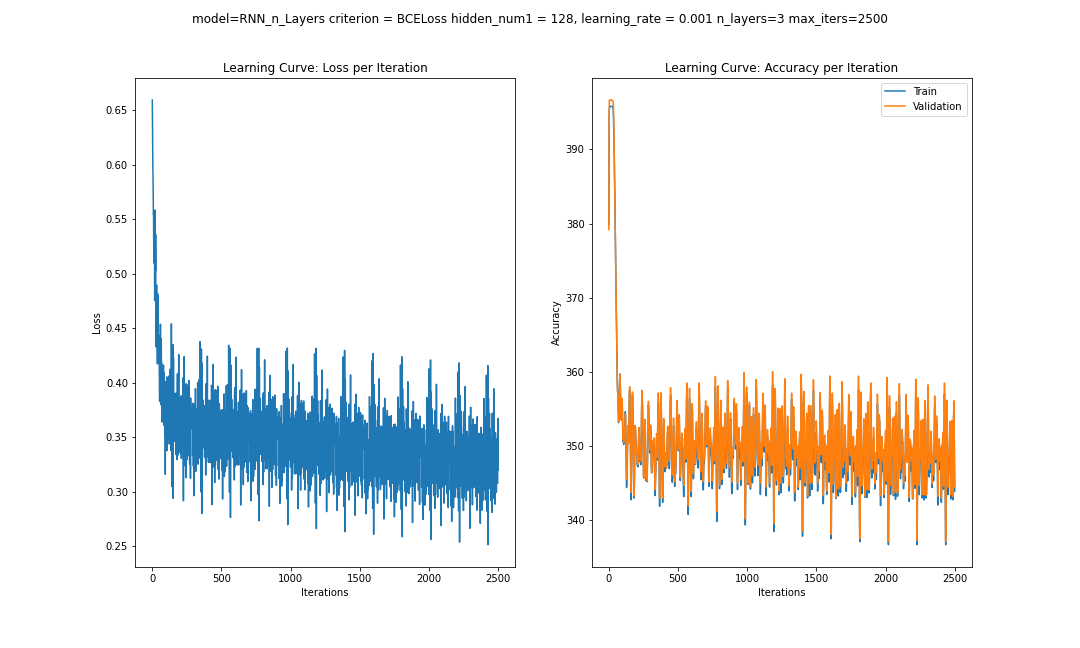


Criterion=MSELoss Hidden Num=128.0 Learning Rate=0.001 N layers=3.0


,precision,recall,f1-score,support
Raining,0.737111,0.550955,0.630581,3140.0
No rain,0.881243,0.944314,0.911689,11080.0


accuracy=0.8574542897327707


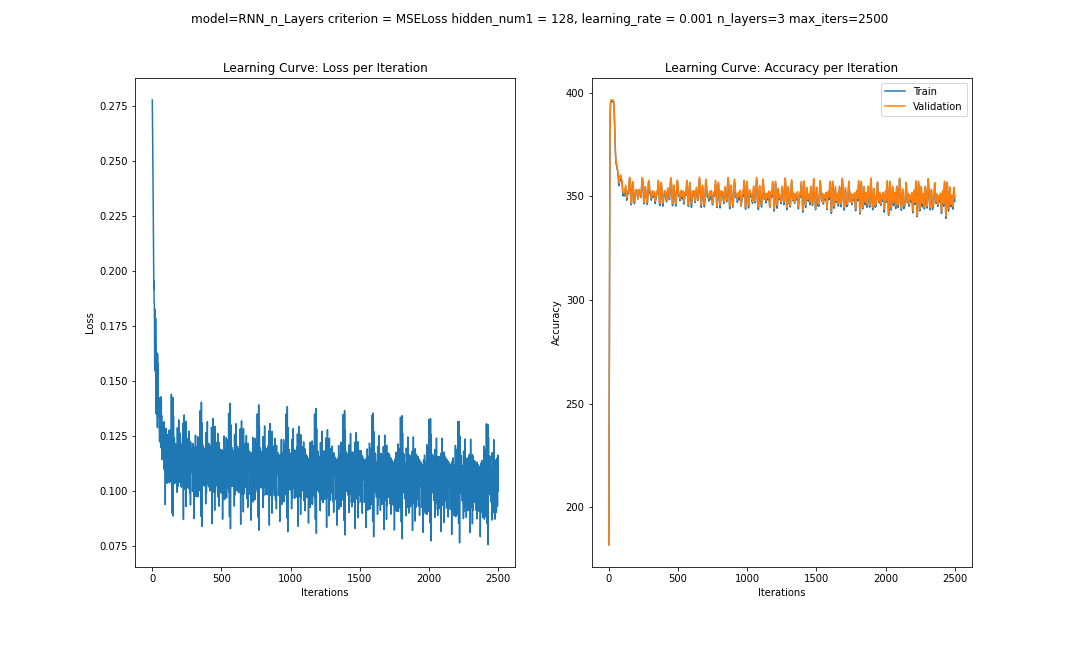

,Unnamed: 0,Model,Criterion,Hidden Num,Learning Rate,N layers,Epochs,accuracy,No rain-precision,No rain-recall,No rain-f1-score,No rain-support,Raining-precision,Raining-recall,Raining-f1-score,Raining-support,Metric
3,3,RNN_n_Layers,MSELoss,128.0,0.001,3.0,2500.0,0.857454,0.881243,0.944314,0.911689,11080.0,0.737111,0.550955,0.630581,3140.0,accuracy
0,0,RNN_n_Layers,BCELoss,128.0,0.001,3.0,2500.0,0.855977,0.886379,0.935018,0.910049,11080.0,0.715640,0.577070,0.638928,3140.0,Raining-f1-score
3,3,RNN_n_Layers,MSELoss,128.0,0.001,3.0,2500.0,0.857454,0.881243,0.944314,0.911689,11080.0,0.737111,0.550955,0.630581,3140.0,No rain-f1-score


In [ ]:
find_best_params(RNN_n_Layers,suffix='_2500')

Using 128-wide hidden layer did not help 

In [ ]:
_=evaluate_model(RNN_n_Layers, criteria_list=criteria_list, hidden_num1_list=[256],  learning_rate_list=learning_rate_list,n_layers=4)

1 of 6 model=RNN_n_Layers criterion = BCELoss hidden_num1 = 256, learning_rate = 0.001 n_layers=4 max_iters=2500
Function evaluate_model_step Took 205.0187 seconds
2 of 6 model=RNN_n_Layers criterion = BCELoss hidden_num1 = 256, learning_rate = 0.0005 n_layers=4 max_iters=2500
Function evaluate_model_step Took 199.3950 seconds
3 of 6 model=RNN_n_Layers criterion = BCELoss hidden_num1 = 256, learning_rate = 0.0001 n_layers=4 max_iters=2500
Function evaluate_model_step Took 200.2939 seconds
4 of 6 model=RNN_n_Layers criterion = MSELoss hidden_num1 = 256, learning_rate = 0.001 n_layers=4 max_iters=2500
Function evaluate_model_step Took 200.4256 seconds
5 of 6 model=RNN_n_Layers criterion = MSELoss hidden_num1 = 256, learning_rate = 0.0005 n_layers=4 max_iters=2500
Function evaluate_model_step Took 200.4650 seconds
6 of 6 model=RNN_n_Layers criterion = MSELoss hidden_num1 = 256, learning_rate = 0.0001 n_layers=4 max_iters=2500
Function evaluate_model_step Took 199.4581 seconds
Function eva

Model with the best metrics used the following hyper parameters:


Metric,Criterion,Hidden Num,Learning Rate,N layers
accuracy,MSELoss,256,0.0010,4
Raining-f1-score,MSELoss,256,0.0010,4
No rain-f1-score,MSELoss,256,0.0001,4



Criterion=MSELoss Hidden Num=256.0 Learning Rate=0.001 N layers=4.0


,precision,recall,f1-score,support
Raining,0.695700,0.602866,0.645965,3140.0
No rain,0.891556,0.925271,0.908100,11080.0


accuracy=0.8540787623066104


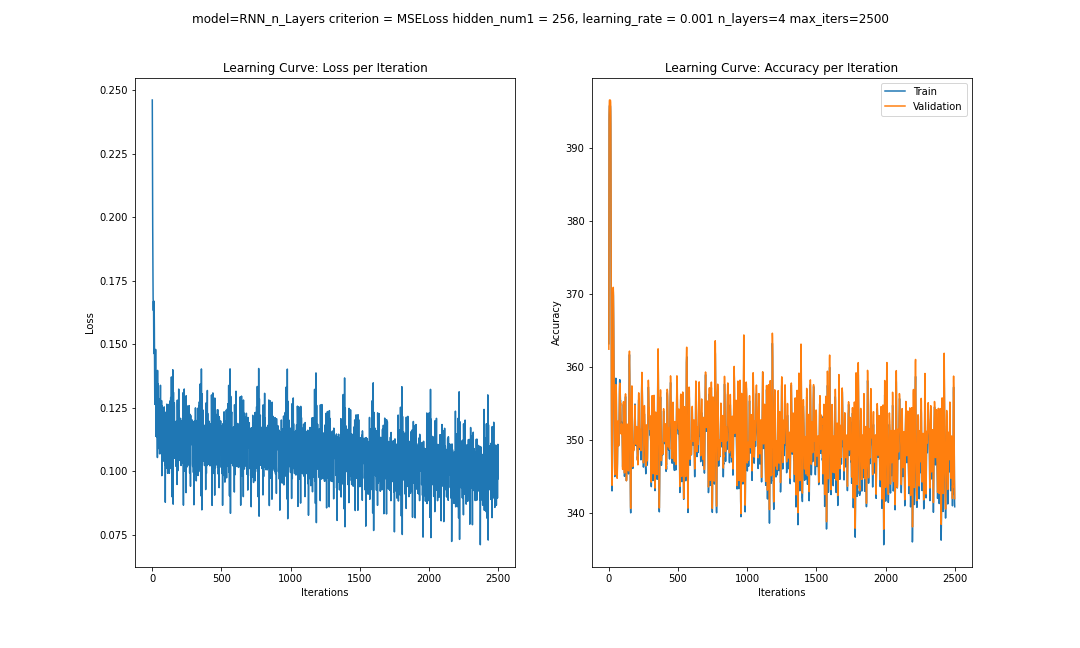


Criterion=MSELoss Hidden Num=256.0 Learning Rate=0.0001 N layers=4.0


,precision,recall,f1-score,support
Raining,0.732240,0.512102,0.602699,3140.0
No rain,0.872588,0.946931,0.908241,11080.0


accuracy=0.8509142053445851


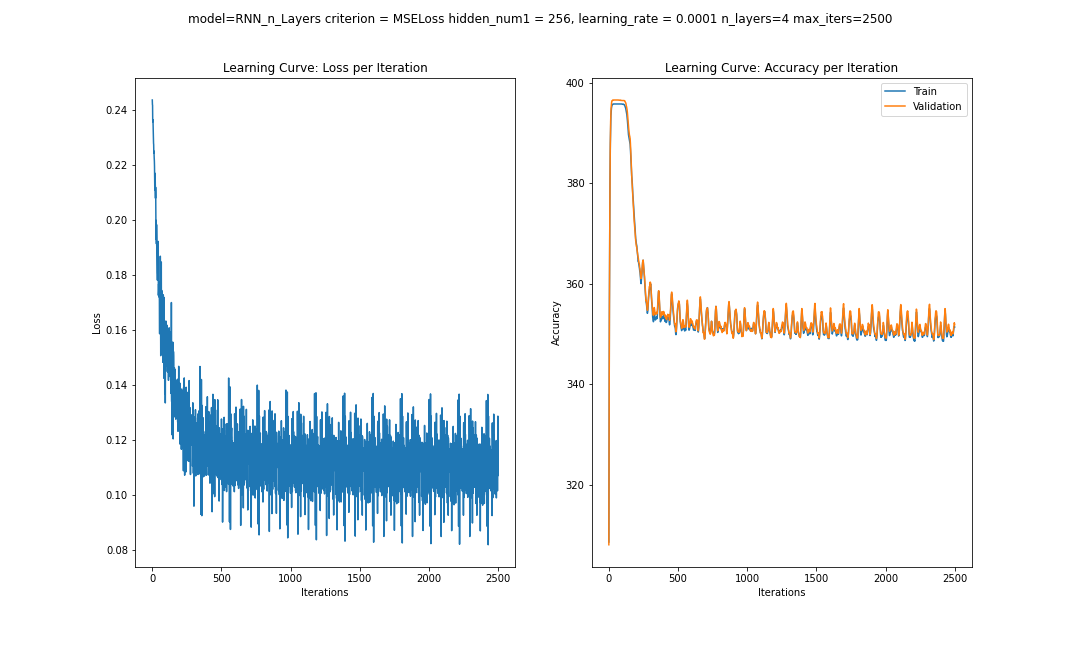

,Unnamed: 0,Model,Criterion,Hidden Num,Learning Rate,N layers,Epochs,accuracy,No rain-precision,No rain-recall,No rain-f1-score,No rain-support,Raining-precision,Raining-recall,Raining-f1-score,Raining-support,Metric
3,3,RNN_n_Layers,MSELoss,256.0,0.0010,4.0,2500.0,0.854079,0.891556,0.925271,0.908100,11080.0,0.69570,0.602866,0.645965,3140.0,accuracy
3,3,RNN_n_Layers,MSELoss,256.0,0.0010,4.0,2500.0,0.854079,0.891556,0.925271,0.908100,11080.0,0.69570,0.602866,0.645965,3140.0,Raining-f1-score
5,5,RNN_n_Layers,MSELoss,256.0,0.0001,4.0,2500.0,0.850914,0.872588,0.946931,0.908241,11080.0,0.73224,0.512102,0.602699,3140.0,No rain-f1-score


In [ ]:
find_best_params(RNN_n_Layers,suffix='_2500')

Using 256-wide hidden layer with 4 layers did not help, either 

#### **Mid Conclusions-RNN:**

Our parameters optimizations were described above similarilty as in MLP.

Interesting to see is, that although RNN preformed generally well, it did not overcome 2 layers MLP score. It seems that both models had reached about 85~86% accuarcy with MLP still having the edge.

For this reason we tried to vary hyper-parameters much, yet it still did not beat the previous model best result.

A possible explanation for this may be that, even though rain and weather forecast surley has a seasonal repetative pattern, the location for example can have a stronger impact on the general prediction for all regions combined.
This is since rain varies greatly between the northern and southern regions of Australia, regardless to the season and time.

Perhaps if we were to predict weather only in a single location, RNN could beat MLP's score since again, it has a strong ability to use its memory, and date and time should have major impact on the possibility of rain.

More possible explanations for this difference can be the common problems with RNN, as we learned in class:

Exploding gradients - The product of a number of gradients which grows with t implies that the computation is likely to diverge as t increases. Such exploding gradients
result in dramatic unstable trajectories during training.
As we didn't see such behavior this is less likley to be the reason. Yet Vanishing Gradient may very much be.

Vanishing Gradient: The vanishing gradient problem occurs when the gradients used to update the network's weights during training become very small, making it difficult for the network to learn long-term dependencies. This can be a problem for RNNs, which are designed to handle sequential data where each input depends on the previous inputs.
RNN's do not exhibit long-term memory (which is one of the motivations for attention-based models, detailed in lectures).
long-term memory is very likley the requierment of seasonal predictions that span over a year cycle of 365 days, and may be the reason for its inferiority.

Short-term memory may also pose a problem in our case.
RNNs have the ability to maintain information about previous inputs in a sequence, but more as a Short-term memory.
This may pose a problem in our case since rain (as a weather prediction) may require a much longer term memory as its patterns may span over a year around of 365 days.




### Model 3 - GRU

Since we did see a potential into emphasizing time memory in rain (as part of weather) forecast, we thought perhaps a less sensitive approach to vanishing gradient may work for us.
We will try 2 of those: **GRU and LSTM**.

**GRU** stands for Gated Recurrent Unit, which is a type of recurrent neural network (RNN) architecture that was introduced in 2014 by Kyunghyun Cho et al. The GRU is considered relatively easy to train and therefore stands out for real time use.

The key feature of the GRU is the use of "gates" to control the flow of information within the network. GRU has an internal state that allows it to maintain information about past inputs as it processes a sequence of inputs. GRU has a single "update" gate and a "reset" gate that control the flow of information in and out of the internal state.

A GRU, like an RNN, is designed to handle sequential data and has a hidden state that maintains information about the previous inputs. However, the use of "gates" in a GRU allows it to selectively retain or discard information as it processes a sequence, **making it better able to model long-term dependencies** than a standard RNN (but not as much as LSTM). At the same time, the simpler architecture of a GRU makes it faster to train and **less prone to the vanishing gradient** problem than an LSTM (Long Short-Term Memory) architecture, which is a more complex type of recurrent network.

GRU illustration from the lectures:
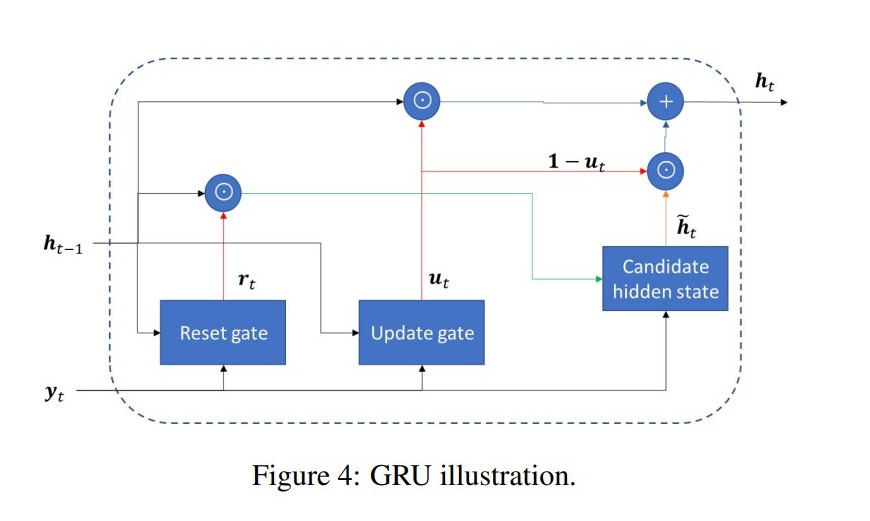

In [ ]:
class GRU_n_Layers(nn.Module):
      def __init__(self, inputs_num, hidden_num1 = 50, n_layers = 3):
        super(GRU_n_Layers, self).__init__()

        # Defining some parameters
        self.hidden_num1 = hidden_num1
        n_layers = n_layers - 1
        self.n_layers = n_layers

        #Defining the layers
        # GRU Layer
        self.GRU = nn.GRU(inputs_num, hidden_num1//4, n_layers, batch_first=True)   
        # Fully connected layer
        self.fc = nn.Linear(hidden_num1//4, 1)
    
      def forward(self, x):

        # Passing in the input and hidden state into the model and obtaining outputs
        out, hidden = self.GRU(x)
        
        # Reshaping the outputs such that it can be fit into the fully connected layer
        out = self.fc(out)
        out = torch.sigmoid(out)
        
        return out


In [ ]:


_=evaluate_model(GRU_n_Layers, criteria_list=criteria_list, hidden_num1_list=hidden_num1_list,  learning_rate_list=learning_rate_list)

1 of 18 model=GRU_n_Layers criterion = BCELoss hidden_num1 = 16, learning_rate = 0.001 n_layers=3 max_iters=2500
Function evaluate_model_step Took 191.8152 seconds
2 of 18 model=GRU_n_Layers criterion = BCELoss hidden_num1 = 16, learning_rate = 0.0005 n_layers=3 max_iters=2500
Function evaluate_model_step Took 192.1249 seconds
3 of 18 model=GRU_n_Layers criterion = BCELoss hidden_num1 = 16, learning_rate = 0.0001 n_layers=3 max_iters=2500


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Function evaluate_model_step Took 191.8757 seconds
4 of 18 model=GRU_n_Layers criterion = BCELoss hidden_num1 = 32, learning_rate = 0.001 n_layers=3 max_iters=2500
Function evaluate_model_step Took 190.4369 seconds
5 of 18 model=GRU_n_Layers criterion = BCELoss hidden_num1 = 32, learning_rate = 0.0005 n_layers=3 max_iters=2500
Function evaluate_model_step Took 193.1792 seconds
6 of 18 model=GRU_n_Layers criterion = BCELoss hidden_num1 = 32, learning_rate = 0.0001 n_layers=3 max_iters=2500
Function evaluate_model_step Took 189.9398 seconds
7 of 18 model=GRU_n_Layers criterion = BCELoss hidden_num1 = 64, learning_rate = 0.001 n_layers=3 max_iters=2500
Function evaluate_model_step Took 196.0229 seconds
8 of 18 model=GRU_n_Layers criterion = BCELoss hidden_num1 = 64, learning_rate = 0.0005 n_layers=3 max_iters=2500
Function evaluate_model_step Took 198.0916 seconds
9 of 18 model=GRU_n_Layers criterion = BCELoss hidden_num1 = 64, learning_rate = 0.0001 n_layers=3 max_iters=2500
Function eva

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Function evaluate_model_step Took 191.1523 seconds
13 of 18 model=GRU_n_Layers criterion = MSELoss hidden_num1 = 32, learning_rate = 0.001 n_layers=3 max_iters=2500
Function evaluate_model_step Took 189.0113 seconds
14 of 18 model=GRU_n_Layers criterion = MSELoss hidden_num1 = 32, learning_rate = 0.0005 n_layers=3 max_iters=2500
Function evaluate_model_step Took 188.8788 seconds
15 of 18 model=GRU_n_Layers criterion = MSELoss hidden_num1 = 32, learning_rate = 0.0001 n_layers=3 max_iters=2500
Function evaluate_model_step Took 188.6974 seconds
16 of 18 model=GRU_n_Layers criterion = MSELoss hidden_num1 = 64, learning_rate = 0.001 n_layers=3 max_iters=2500
Function evaluate_model_step Took 191.5827 seconds
17 of 18 model=GRU_n_Layers criterion = MSELoss hidden_num1 = 64, learning_rate = 0.0005 n_layers=3 max_iters=2500
Function evaluate_model_step Took 196.3756 seconds
18 of 18 model=GRU_n_Layers criterion = MSELoss hidden_num1 = 64, learning_rate = 0.0001 n_layers=3 max_iters=2500
Functi

Model with the best metrics used the following hyper parameters:


Metric,Criterion,Hidden Num,Learning Rate,N layers
accuracy,BCELoss,64,0.001,3
Raining-f1-score,BCELoss,64,0.001,3
No rain-f1-score,BCELoss,64,0.001,3


,precision,recall,f1-score,support
Raining,0.756567,0.550318,0.637168,3140.0
No rain,0.881702,0.949819,0.914494,11080.0


accuracy=0.8616033755274262


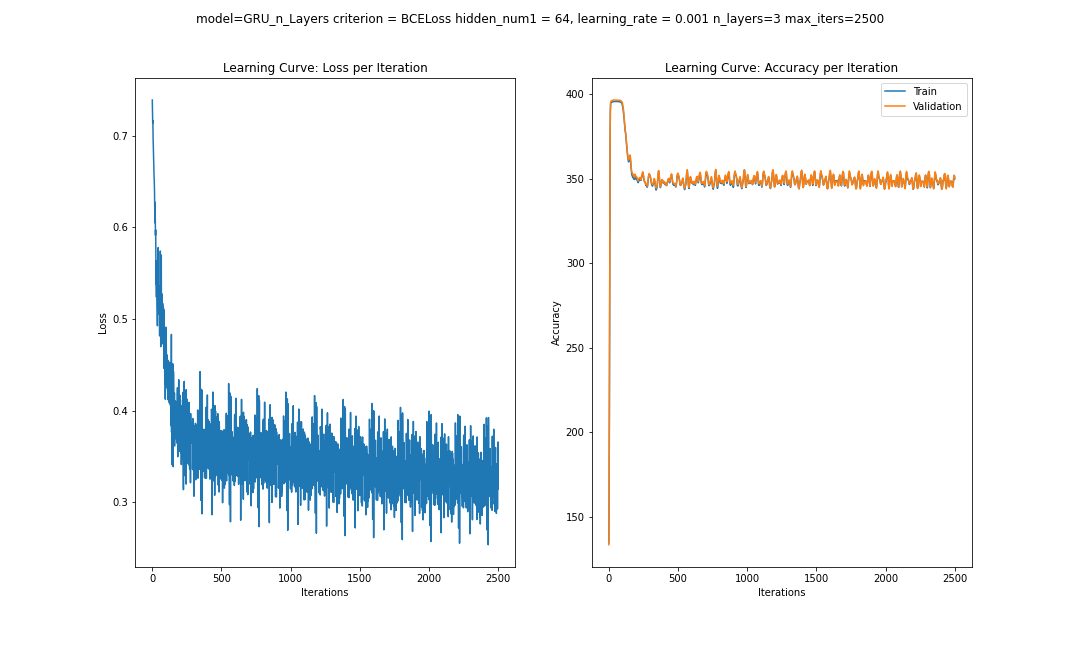

In [ ]:
summary_df=update_summary(GRU_n_Layers,summary_df)

#### **Mid Conclusion-GRU:**

As predicted, GRU did improve RNN's results.
Even though, it still did not beat the first score of 2 layers MLP. It seems that even if vanishing gradient and long-term memory issues were present at RNN and now had been improved, they still had a minor impact on the model.

If so, a possible explanation remains the previously described hypothesis that other features have a stronger impact on rain predioctions than time, or at least dont require long term memory for a better prediction. One possible feature can be location, as described above, Australia's annual rainfall varies greatly within locations regardless to seasons and may be a key value for prediction.


### Model 4 - LSTM

Another model we wanted to try is LSTM.

LSTM stands for Long Short-Term Memory, which is a type of recurrent neural network (RNN) architecture designed to capture long-term dependencies in sequential data, such as time series or natural language sentences.

In our case, we again hope this model may improve our predictions as it emphasizes long term memory - which may be relevant to all of our data, not only to the date variable. This is since there might be a long term year around pattern of 365 days that can help predict rain. Therefore it makes sense for us to try it.

The key idea behind LSTM is to introduce memory cells that allow the network to selectively forget or remember information at each time step, thereby preventing the vanishing gradient problem commonly encountered in traditional RNNs. Additionally, LSTM networks contain input and output gates, which regulate the flow of information into and out of the memory cells, respectively.

in GRU, the reset gate determines which information to discard from the previous time step, while the update gate decides how much of the new information to keep from the current time step.
In an LSTM network on the other hand, the forget gate decides which information to discard from the memory cell, the input gate decides which new information to store, and the output gate decides what information to output. This means that the LSTM architecture can handle long-term dependencies much better and has the ability to selectively forget and remember information.




In [ ]:
class LSTM_n_Layers(nn.Module):
      def __init__(self, inputs_num, hidden_num1 = 50, n_layers = 3):
        super(LSTM_n_Layers, self).__init__()

        # Defining some parameters
        self.hidden_num1 = hidden_num1
        n_layers = n_layers - 1
        self.n_layers = n_layers

        #Defining the layers
        # GRU Layer
        self.LSTM = nn.LSTM(inputs_num, hidden_num1//4, n_layers, batch_first=True)   
        # Fully connected layer
        self.fc = nn.Linear(hidden_num1//4, 1)
    
      def forward(self, x):

        # Passing in the input and hidden state into the model and obtaining outputs
        out, hidden = self.LSTM(x)
        
        # Reshaping the outputs such that it can be fit into the fully connected layer
        out = self.fc(out)
        out = torch.sigmoid(out)
        
        return out

In [ ]:


_=evaluate_model(LSTM_n_Layers, criteria_list=criteria_list, hidden_num1_list=hidden_num1_list,  learning_rate_list=learning_rate_list)

1 of 18 model=LSTM_n_Layers criterion = BCELoss hidden_num1 = 16, learning_rate = 0.001 n_layers=3 max_iters=2500
Function evaluate_model_step Took 193.6933 seconds
2 of 18 model=LSTM_n_Layers criterion = BCELoss hidden_num1 = 16, learning_rate = 0.0005 n_layers=3 max_iters=2500
Function evaluate_model_step Took 193.4298 seconds
3 of 18 model=LSTM_n_Layers criterion = BCELoss hidden_num1 = 16, learning_rate = 0.0001 n_layers=3 max_iters=2500


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Function evaluate_model_step Took 193.3155 seconds
4 of 18 model=LSTM_n_Layers criterion = BCELoss hidden_num1 = 32, learning_rate = 0.001 n_layers=3 max_iters=2500
Function evaluate_model_step Took 190.5053 seconds
5 of 18 model=LSTM_n_Layers criterion = BCELoss hidden_num1 = 32, learning_rate = 0.0005 n_layers=3 max_iters=2500
Function evaluate_model_step Took 191.3488 seconds
6 of 18 model=LSTM_n_Layers criterion = BCELoss hidden_num1 = 32, learning_rate = 0.0001 n_layers=3 max_iters=2500


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Function evaluate_model_step Took 192.1040 seconds
7 of 18 model=LSTM_n_Layers criterion = BCELoss hidden_num1 = 64, learning_rate = 0.001 n_layers=3 max_iters=2500
Function evaluate_model_step Took 196.0631 seconds
8 of 18 model=LSTM_n_Layers criterion = BCELoss hidden_num1 = 64, learning_rate = 0.0005 n_layers=3 max_iters=2500
Function evaluate_model_step Took 195.7987 seconds
9 of 18 model=LSTM_n_Layers criterion = BCELoss hidden_num1 = 64, learning_rate = 0.0001 n_layers=3 max_iters=2500
Function evaluate_model_step Took 194.1101 seconds
10 of 18 model=LSTM_n_Layers criterion = MSELoss hidden_num1 = 16, learning_rate = 0.001 n_layers=3 max_iters=2500
Function evaluate_model_step Took 190.3142 seconds
11 of 18 model=LSTM_n_Layers criterion = MSELoss hidden_num1 = 16, learning_rate = 0.0005 n_layers=3 max_iters=2500
Function evaluate_model_step Took 190.1023 seconds
12 of 18 model=LSTM_n_Layers criterion = MSELoss hidden_num1 = 16, learning_rate = 0.0001 n_layers=3 max_iters=2500


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Function evaluate_model_step Took 190.9358 seconds
13 of 18 model=LSTM_n_Layers criterion = MSELoss hidden_num1 = 32, learning_rate = 0.001 n_layers=3 max_iters=2500
Function evaluate_model_step Took 190.1005 seconds
14 of 18 model=LSTM_n_Layers criterion = MSELoss hidden_num1 = 32, learning_rate = 0.0005 n_layers=3 max_iters=2500
Function evaluate_model_step Took 189.5698 seconds
15 of 18 model=LSTM_n_Layers criterion = MSELoss hidden_num1 = 32, learning_rate = 0.0001 n_layers=3 max_iters=2500


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Function evaluate_model_step Took 204.9789 seconds
16 of 18 model=LSTM_n_Layers criterion = MSELoss hidden_num1 = 64, learning_rate = 0.001 n_layers=3 max_iters=2500
Function evaluate_model_step Took 212.4704 seconds
17 of 18 model=LSTM_n_Layers criterion = MSELoss hidden_num1 = 64, learning_rate = 0.0005 n_layers=3 max_iters=2500
Function evaluate_model_step Took 211.6394 seconds
18 of 18 model=LSTM_n_Layers criterion = MSELoss hidden_num1 = 64, learning_rate = 0.0001 n_layers=3 max_iters=2500
Function evaluate_model_step Took 212.0978 seconds
Function evaluate_model Took 3532.5909 seconds


Model with the best metrics used the following hyper parameters:


Metric,Criterion,Hidden Num,Learning Rate,N layers
accuracy,BCELoss,64,0.001,3
Raining-f1-score,BCELoss,64,0.001,3
No rain-f1-score,BCELoss,64,0.001,3


,precision,recall,f1-score,support
Raining,0.757117,0.542038,0.631774,3140.0
No rain,0.879886,0.950722,0.913934,11080.0


accuracy=0.8604781997187061


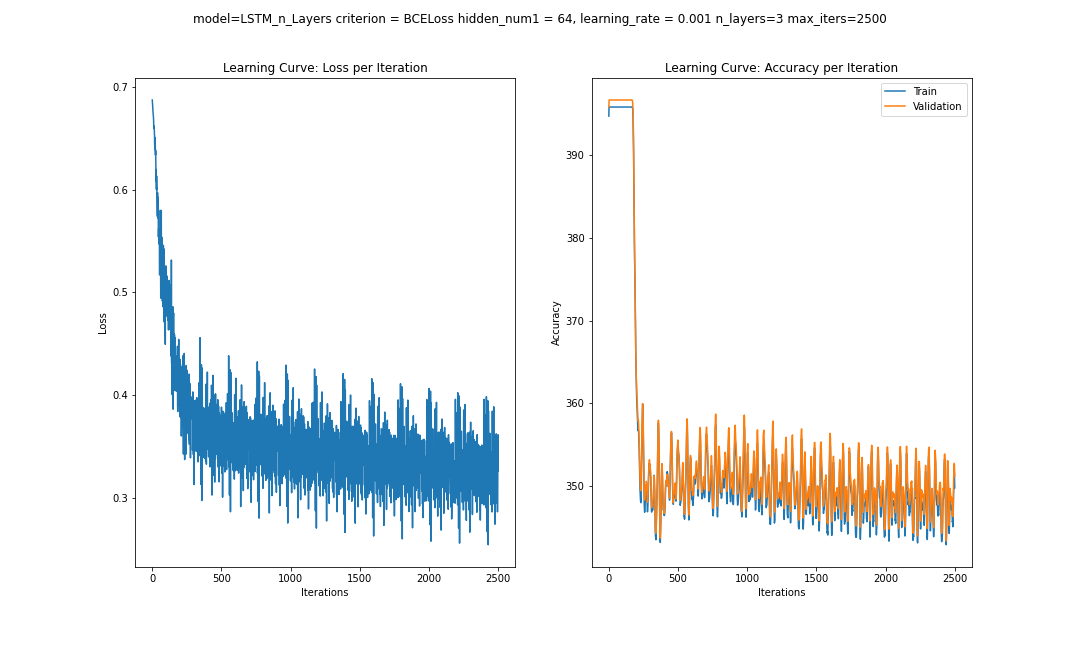

In [ ]:
summary_df=update_summary(LSTM_n_Layers,summary_df)

#### **Mid Conclusion-LSTM:**

LSTM did improve RNN's results, but still not above MLP's score.
It seems long term memory does not contribute that much to the train of our model, even if the difference from MLP is not that much.
It seems if we want to improve our model even furthermore, different approaches shall be taken.

**Let's continue to compare our models numerically:**


## **Model Comparison**

In [ ]:
def compare_metric(metric):
  df=summary_df.query(f'Metric=="{metric}"')[['Model',metric]].sort_values(metric)
  display_table(df)
  return df

def show_diffs(df,metric):
  diffs=df.copy()
  diffs['diff']=df[metric]-df[metric].min()
  diffs.plot.barh(y='diff',x='Model',legend=False, title=f'Differences in {metric} from minimum value')

### Accuracy

In [ ]:
accuracy_df=compare_metric('accuracy')

Model,accuracy
RNN_n_Layers,0.858228
LSTM_n_Layers,0.860478
MLP_3_Layers_leaky_relu,0.861603
GRU_n_Layers,0.861603
MLP_3_Layers,0.861674
MLP_4_Layers,0.862588
MLP_2_Layers,0.864346


The best accuracy is achieved by MLP with 2 Layers.

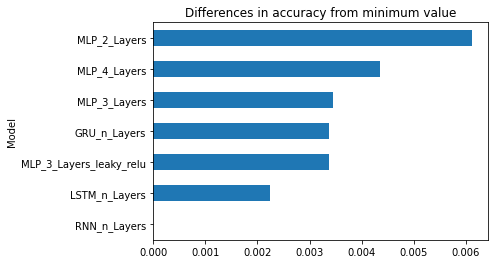

In [ ]:
show_diffs(accuracy_df,'accuracy')

The differences in accuracy between models is very low.

### No rain F1-score

In [ ]:
no_rain_f1_score_df=compare_metric('No rain-f1-score')

Model,No rain-f1-score
RNN_n_Layers,0.912355
LSTM_n_Layers,0.913934
GRU_n_Layers,0.914494
MLP_3_Layers_leaky_relu,0.914724
MLP_3_Layers,0.914734
MLP_4_Layers,0.915000
MLP_2_Layers,0.916258


The best no rain F1-score is achieved by MLP with 2 Layers.

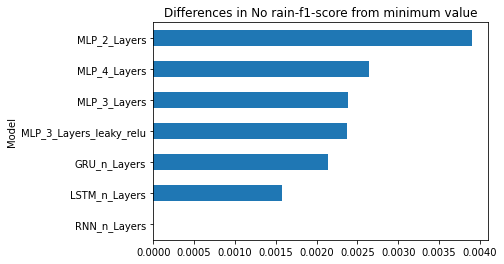

In [ ]:
show_diffs(no_rain_f1_score_df,'No rain-f1-score')

The differences in no rain F1-score between models is very low.

### Raining F1-score

In [ ]:
raining_f1_score_df=compare_metric('Raining-f1-score')

Model,Raining-f1-score
RNN_n_Layers,0.629275
LSTM_n_Layers,0.631774
MLP_3_Layers_leaky_relu,0.634580
MLP_3_Layers,0.636643
GRU_n_Layers,0.637168
MLP_2_Layers,0.643108
MLP_4_Layers,0.651773


The best raining F1-score is achieved by MLP with 4 Layers.

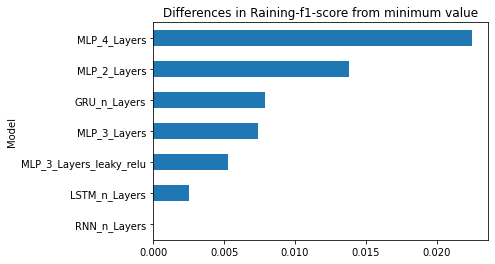

In [ ]:
show_diffs(raining_f1_score_df,'Raining-f1-score')

The differences in raining F1-score are higher than other metrics.

## **Conclusions**

The best results by metric are:

<table>
	<tr>
		<th>Metric</th>
		<th>Model</th>
		<th>Value</th>
	</tr>
	<tr>
		<td>Accuracy</td>
		<td>MLP_2_Layers</td>
		<td>0.864346</td>
	</tr>
	<tr>
		<td>No rain F1-Score</td>
		<td>MLP_2_Layers</td>
		<td>0.916258</td>
	</tr>
	<tr>
		<td>Raining F1-Score</td>
		<td>MLP_4_Layers</td>
		<td>0.651773</td>
	</tr>

</table>

* These results are better than most Kaggle projects we have examined (see "Comparison to Other Sources" below). We believe this is due to larger epochs count in this projec, the pre-processing of the data and the hyper-parameter optimization.
* We expected that more advanced models such as RNN, GRU, and LSTM would provide better results than "simple" MLP.
* Morever, we expected MLP with more layers to provide better results. However, 2-Layer MLP provided the best accuracy.
* Possible reasons and disccussions were elaborated in each of the models mid-conclusions.
* There is significant imbalance in RainTomorrow data. We have considered using oversampling to achive more balanced data. However, results in [18] show that such operation does not significantly improve the results.
* We saw very high accuracy at the initial iterations of training:

As previously discussed, it is surprising to see that the 2-Layer MLP provided the best accuracy. Yet, this case is certainly possible and can occur in some works, especially if they are not complex and prefer shallower networks. We predict a binary Yes or No output which may contribute to such simplicity but of course it depends also on the data.

Other models which we were curious to try included memory capabilities. Although we expected them to improve, since weather usually holds a repetative pattern around seasons, this was not the case. A possible explanation was again, that aspecific variable such as location may be a more dominant factor for prediction, over a repetative pattern that require memory.

Our preprocessing seemed to produce good results and contribute to the prediction. Preprocessing is a crucial part before any training procedure and we aimed to address it comprehensivley.

Overall, we believe our work had reached a very good prediction performance, based on the initial bias that is already high, and despite it.
The biased data had caused issues as we thought it may, yet we succeeded addressing them in such way that places our work in a very good place compared to other works(as will be further discussed in Benchmarks sections).

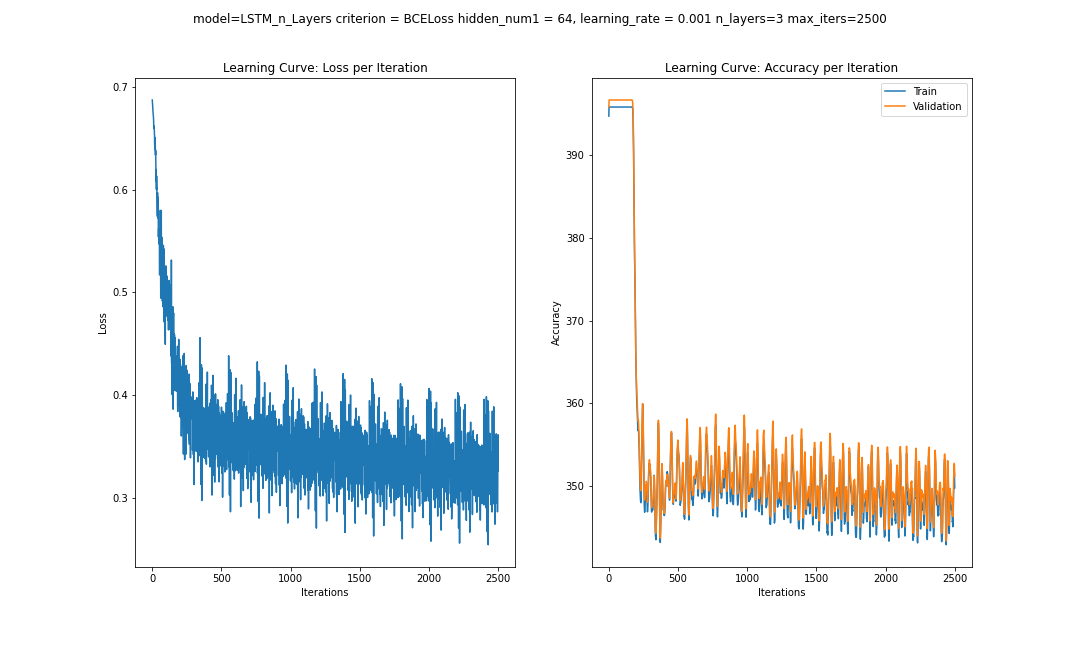

In [ ]:
dispaly_chart_by_name('model=LSTM_n_Layers criterion = BCELoss hidden_num1 = 64, learning_rate = 0.001 n_layers=3 max_iters=2500')

> We believe that this is a result of overfitting that happens due to imbalance in target values (RainTomorrow)

### Benchmarks - Comparison to other works

```
# This is formatted as code
```

Comparison to Other Sources

The following table compares our results with some published work:


<table>
	<tr>
		<th>Source</th>
		<th>Method</th>
		<th>Epochs</th>
		<th>Accuracy</th>
		<th>Raining F1-Score</th>
		<th>No rain F1-Score</th>
		<th>Comment</th>
	</tr>
	<tr>
		<td>This project</td>
		<td>MLP_2_Layers</td>
		<td>2500</td>
		<td>0.86</td>
		<td>0.643108</td>
		<td>0.916258</td>
		<td>MLP_2_Layers provided best accuracy and no rain F1-score</td>
	</tr>
	<tr>
		<td>This project</td>
		<td>MLP_4_Layers</td>
		<td>2500</td>
		<td>0.86</td>
		<td>0.636751</td>
		<td>0.915000</td>
		<td>MLP_4_Layers provided best accuracy and raining F1-score</td>
	</tr>
	<tr>
		<td>[12]</td>
		<td>3 Dense layers</td>
		<td>256</td>
		<td>0.845</td>
		<td>?</td>
		<td>?</td>
		<td>Used upsampling to balance data</td>
	</tr>
	<tr>
		<td>[13]</td>
		<td>5 Dense layers with dropouts</td>
		<td>200</td>
		<td>0.85</td>
		<td>0.59</td>
		<td>0.91</td>
		<td>Used undersampling to balance data</td>
	</tr>
	<tr>
		<td>[14]</td>
		<td>5 Dense layers with dropouts</td>
		<td>150</td>
		<td>0.85</td>
		<td>0.59</td>
		<td>0.91</td>
		<td>No data balancing</td>
	</tr>
	<tr>
		<td>[15]</td>
		<td>5 Dense layers with dropouts</td>
		<td>150</td>
		<td>0.85</td>
		<td>0.59</td>
		<td>0.91</td>
		<td>No data balancing</td>
	</tr>
</table>

Better results have been reported in [16], [17], and [18]. However, these projects used ensemble learning.

We've found other works that reached better perfromance but did not train many iterations - therefore we suspect these works were much probably overfitted or, since the data is biased there might have been an impact receiving good perfromance at first iterations (as we've seen before). This of course, does not imply on a good performance on the general case.

We beleieve our work had reached a very good performance compared to relevant other models, as described and seen above.

### Possible Improvements

We have planned several additional research directions:
* Due to resource and runtime limitations we relied on an assumption that the best number of epochs for MLP_2_Layers is valied for other models. This assumption needs to be verified.
* Collect more data in such way it will be un-biased. This was a major issue in our work that can significantly improve performance if can be achieved.
* There are additional criteria that can be used (e.g. CrossEntropyLoss, BCEWithLogitsLoss).
* There are additional optimizers that can be used (e.g. SGD).
* LR scheduler can be used to adjust learning rate.
* Use automated outlier detection
* Use ensemble learning.
* Add calculated features, e.g. difference between temperatures
* Use of automated hyperparameter tuning, such as tools in Hyperopt package.
* Conduct an ablation study


## **References**


<ol type="1">
<li>Nir's lectures</li>
<li><a href="https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package">Rain in Australia - the dataset]</a></li> 
<li><a href="https://www.kaggle.com/code/sahilambekar777/neural-net-pytorch-torch-nn-indepth-for-beginner">SAHIL AMBEKAR, Neural Net Pytorch (torch.nn) inDepth for Beginner]</a></li>
<li><a href="https://www.freecodecamp.org/news/handling-overfitting-in-deep-learning-models/">Bert Carremans, How to Handle Overfitting in Deep Learning Models]</a></li>
<li><a href="https://www.kaggle.com/code/sohida/rain-prediction-using-ann">SOHIDA, Rain Prediction using ANN]</a></li>
<li><a href="https://www.kaggle.com/code/data13/recurrent-neural-network-for-rain-forecasting#Building-the-Neural-Network">ASMAA, Recurrent Neural Network for Rain Forecasting]</a></li>
<li><a href="https://www.analyticsvidhya.com/blog/2021/07/understanding-rnn-step-by-step-with-pytorch/">Pritesh Prakash, Understanding RNN Step by Step with PyTorch]</a></li>
<li><a href="https://blog.floydhub.com/a-beginners-guide-on-recurrent-neural-networks-with-pytorch/">Gabriel Loye, A Beginner’s Guide on Recurrent Neural Networks with PyTorch]</a></li>
<li><a href="https://www.kaggle.com/code/andradaolteanu/pytorch-rnns-and-lstms-explained-acc-0-99">ANDRADA OLTEANU, PyTorch RNNs and LSTMs Explained (Acc 0.99)]</a></li>
<li><a href="https://www.kaggle.com/code/fahadmehfoooz/rain-prediction-with-90-65-accuracy#1.9-Dealing-with-the-missing-values">FAHAD MEHFOOZ, Rain Prediction with 90.65 % accuracy]</a></li>
<li><a href="https://www.kaggle.com/code/midouazerty/rainfall-prediction-with-6-machine-learn-algo-98">SALAH SAMMARI, Rainfall Prediction with 6 Machine Learn Algo 98%]</a></li>
<li><a href="https://medium.com/ai-techsystems/next-day-rain-prediction-on-cainvas-ccb5ac9fe543">Next day rain prediction — on cAInvas (AITS Journal)</a></li>
<li><a href="https://www.kaggle.com/code/sudhanshu2198/rain-prediction-in-australia-using-neural-networks">SUDHANSHU RASTOGI, Rain Prediction in Australia using Neural Networks</a></li>
<li><a href="https://www.kaggle.com/code/kikacode/neural-networks-predicting-rain-in-australia">KIKACODES, Neural Networks - Predicting rain in Australia</a></li>
<li><a href="https://www.kaggle.com/code/karnikakapoor/rain-prediction-ann">KARNIKA KAPOOR, Rain Prediction: ANN</a></li>
<li><a href="https://www.kaggle.com/code/siddheshera/rain-in-australia-with-eda-h2o-88-4-auc/notebook">SIDDHESH SAWANT, Rain in Australia with EDA & H2O (88.4% AUC)</a></li>
<li><a href="https://www.kaggle.com/code/fabriciotorquato/rain-in-australia-classifier">FABRICIO TORQUATO, Rain in Australia - Classifier</a></li>
<li><a href="https://www.kaggle.com/code/s2594188/rainfall-in-australia-extensive-eda-prediction#Oversampling-the-Minority-class-of-the-target-data-(ONLY-for-df_train!)">JULIEN, Rainfall in Australia, extensive EDA + prediction</a></li>
</ol>